In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

In [2]:
library(zoo)

Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [15]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.3.4     v purrr   0.2.4
v tidyr   0.7.2     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.2.0
v tibble  1.3.4     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks plotly::filter(), stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
data0717 = read.csv("loan0717.csv", stringsAsFactors = F)

In [5]:
viz = data0717

In [6]:
viz = viz[viz$purpose != '',]

In [7]:
viz$int_rate = as.numeric(gsub(pattern = "%",replacement = "",x = viz$int_rate))

In [8]:
viz$loan_status = gsub('Does not meet the credit policy. Status:','',viz$loan_status)

In [9]:
viz$issue_d_1 <- as.Date(as.yearmon(viz$issue_d, "%b-%Y"))

In [10]:
table(viz$loan_status)


       Charged Off            Current            Default         Fully Paid 
            177018             659808                 52             673940 
   In Grace Period  Late (16-30 days) Late (31-120 days) 
              9878               3697              18839 

In [11]:
viz2 = viz[viz$loan_status !='Current',]

In [12]:
#viz2$is_default = ifelse(viz2$loan_status %in% c('Charged Off','Default','In Grace Period','Late (16-30 days)','Late (31-120 days)'),1,0)
#data type cannot be categorized

In [12]:
viz2$is_default = ifelse(viz2$loan_status %in% c('Charged Off','Default','In Grace Period','Late (16-30 days)','Late (31-120 days)'),'default','fully_paid')

In [14]:
table(viz2$is_default)


   default fully_paid 
    209484     673940 

# Interest rate and issue_datem

Warning message:
"Removed 21 rows containing missing values (geom_point)."

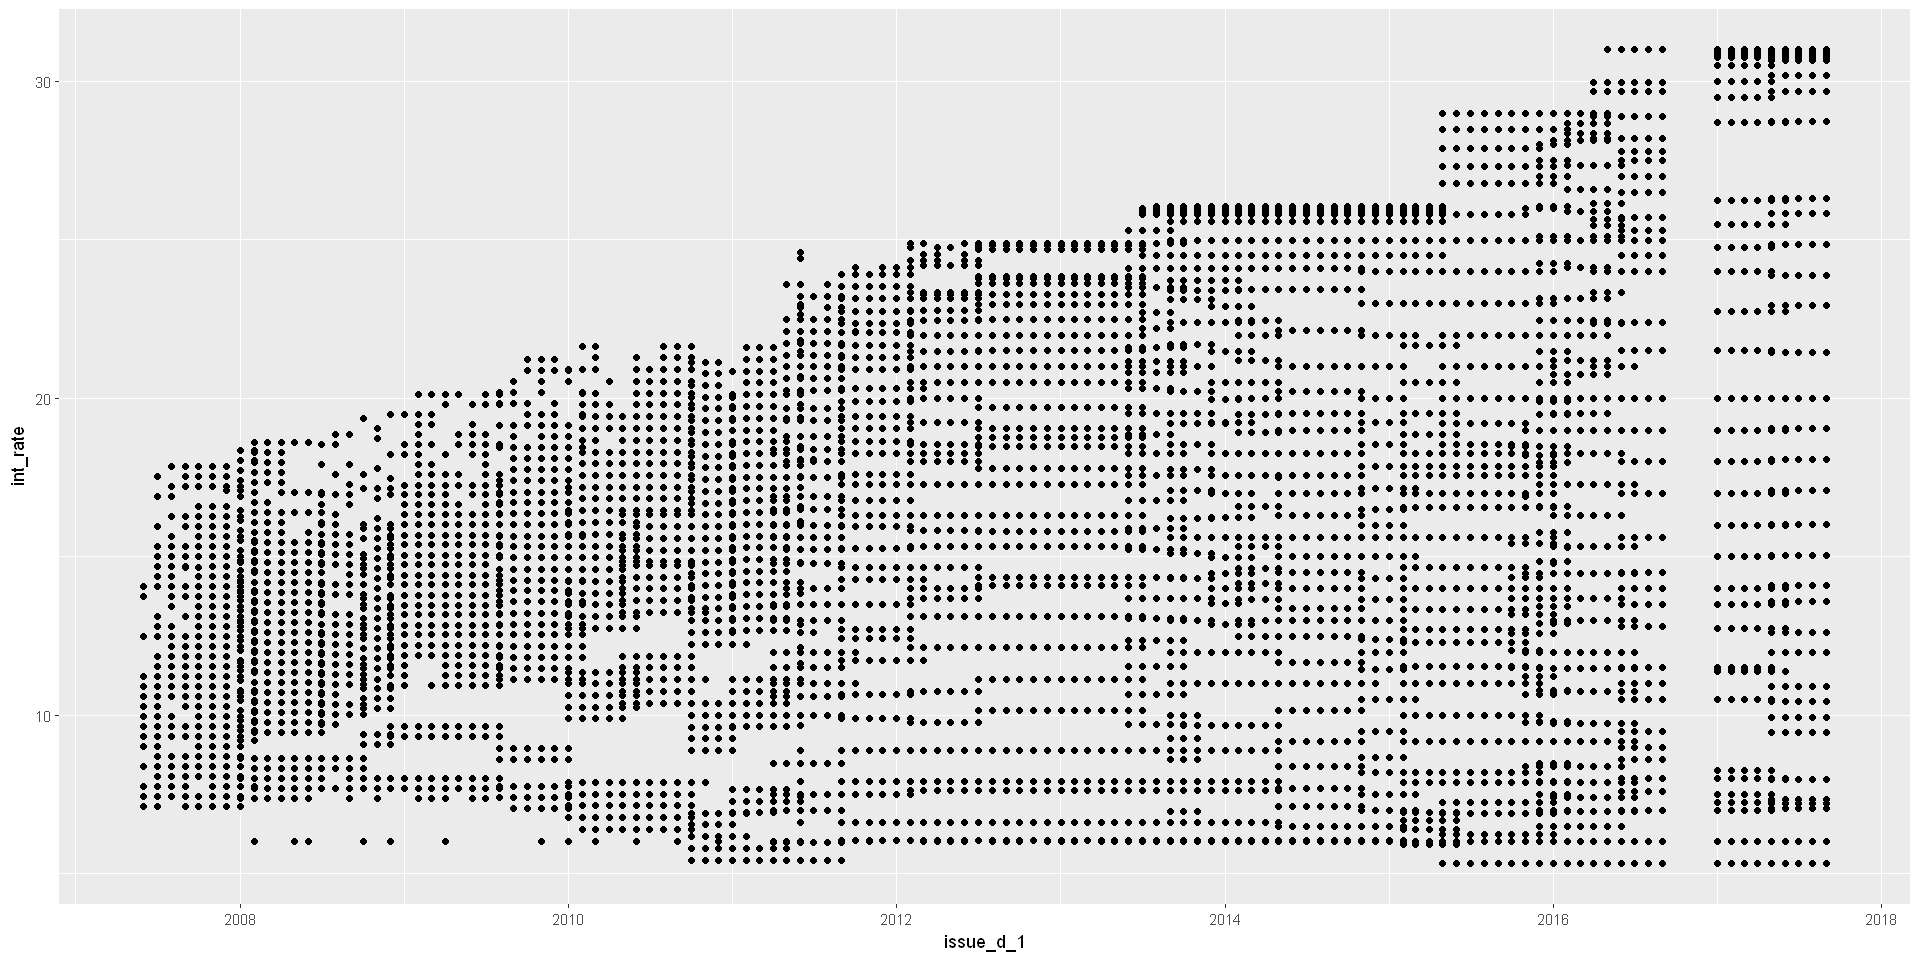

In [38]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(data = viz) + geom_point(mapping = aes(x = issue_d_1, y = int_rate))

`geom_smooth()` using method = 'gam'
Warning message:
"Removed 21 rows containing non-finite values (stat_smooth)."

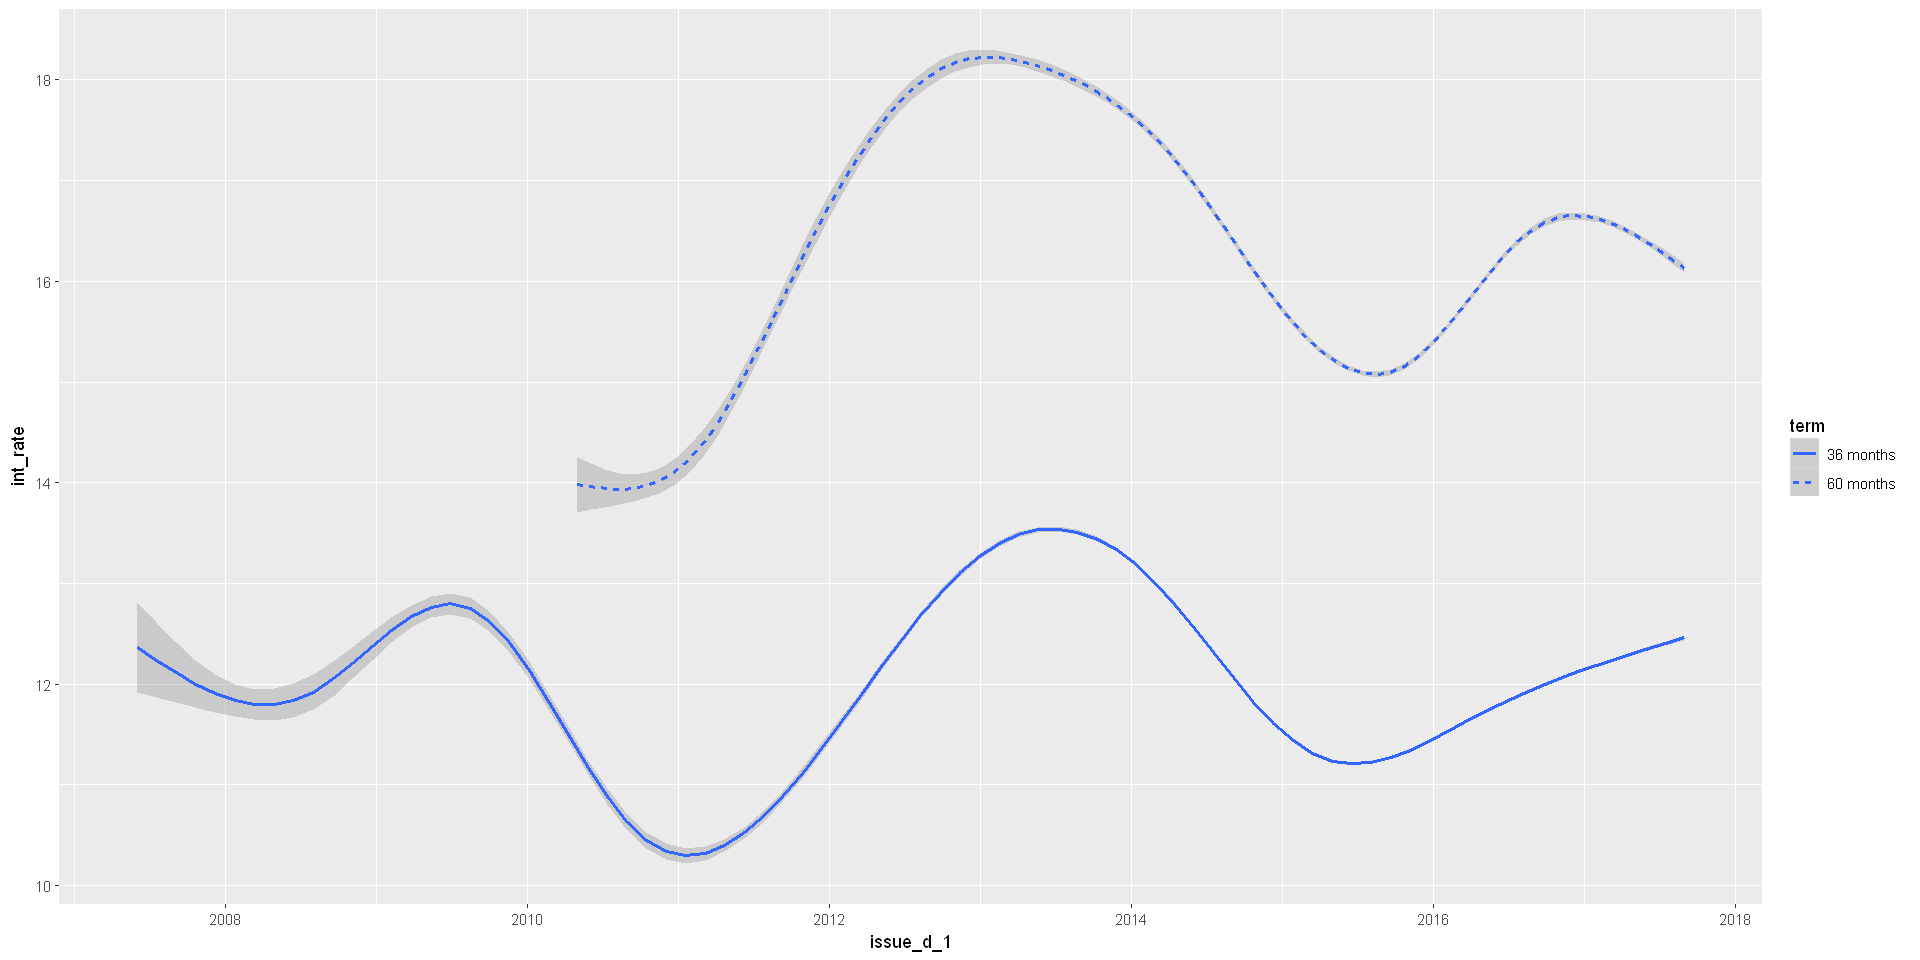

In [39]:
ggplot(data = viz) + geom_smooth(mapping = aes(x = issue_d_1, y = int_rate, linetype = term))

Purpose

In [17]:
table(viz$purpose)


               car        credit_card debt_consolidation        educational 
             16479             343432             896036                423 
  home_improvement              house     major_purchase            medical 
            101632               6794              33127              17432 
            moving              other   renewable_energy     small_business 
             10617              86194                997              17397 
          vacation            wedding 
             10323               2349 

# purpose_loan_status

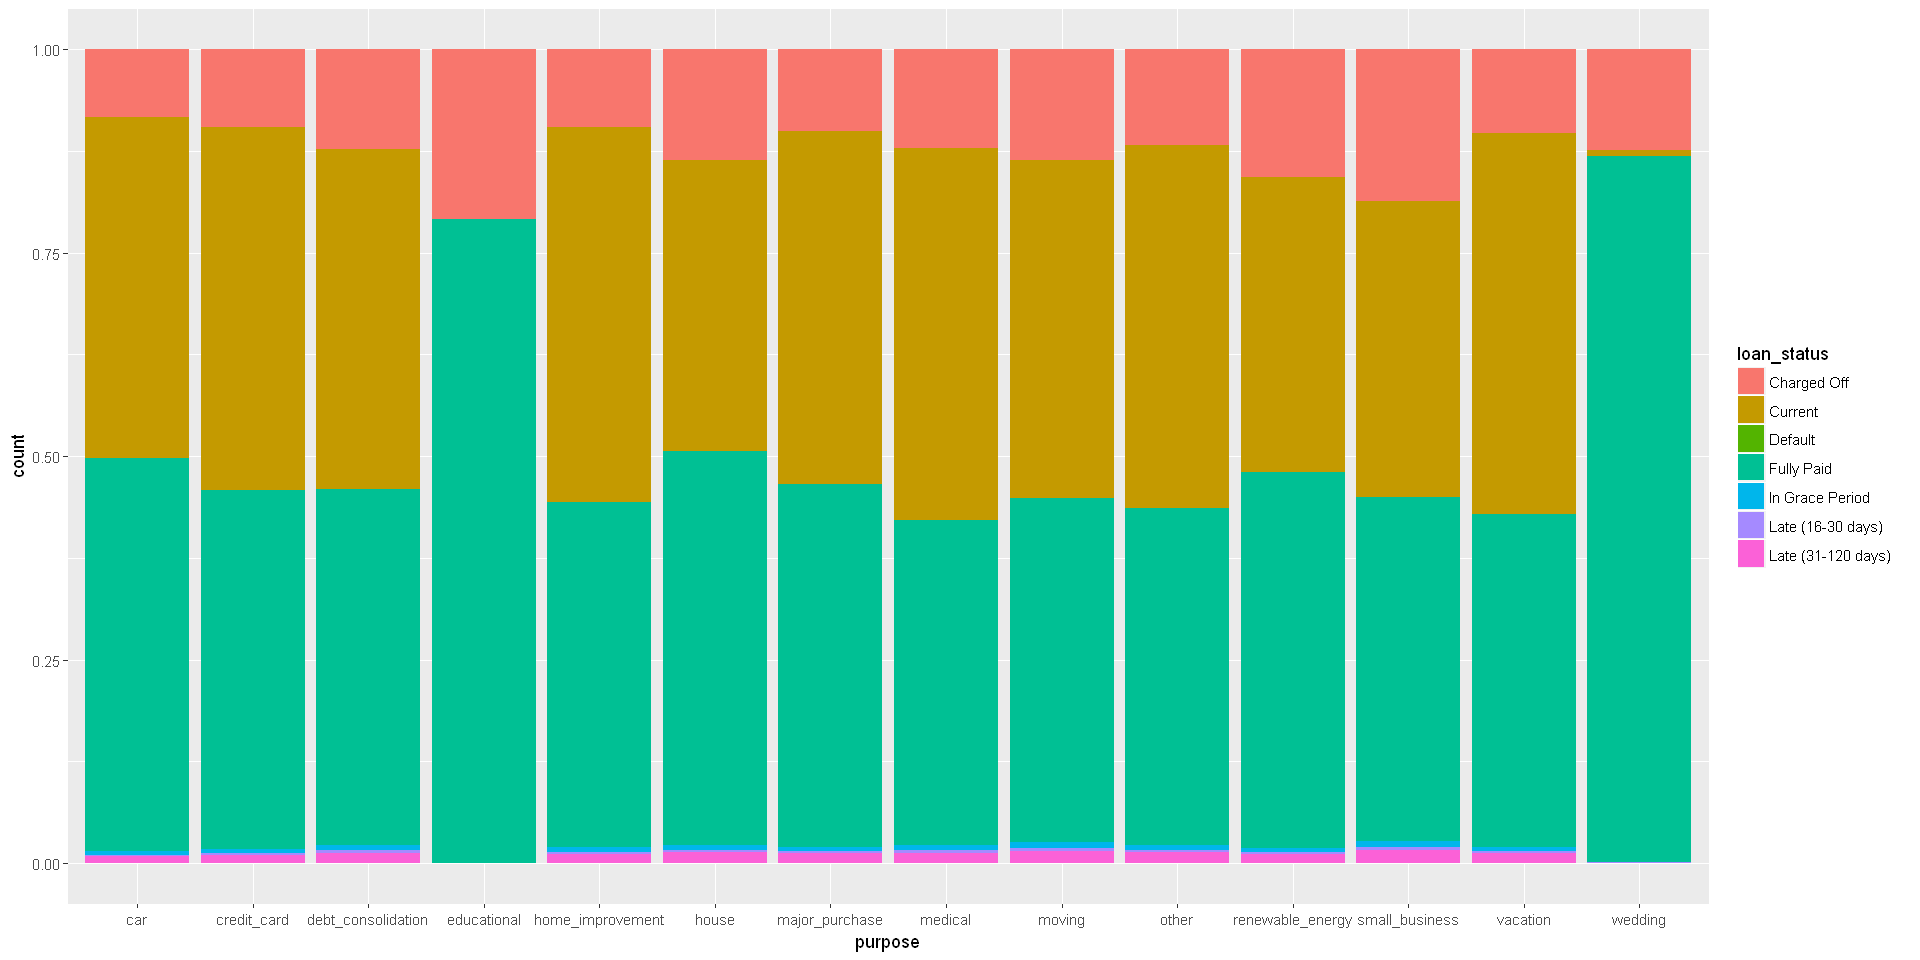

In [18]:
ggplot(data = viz) + geom_bar(mapping = aes(x = purpose, fill = loan_status), position = 'fill')

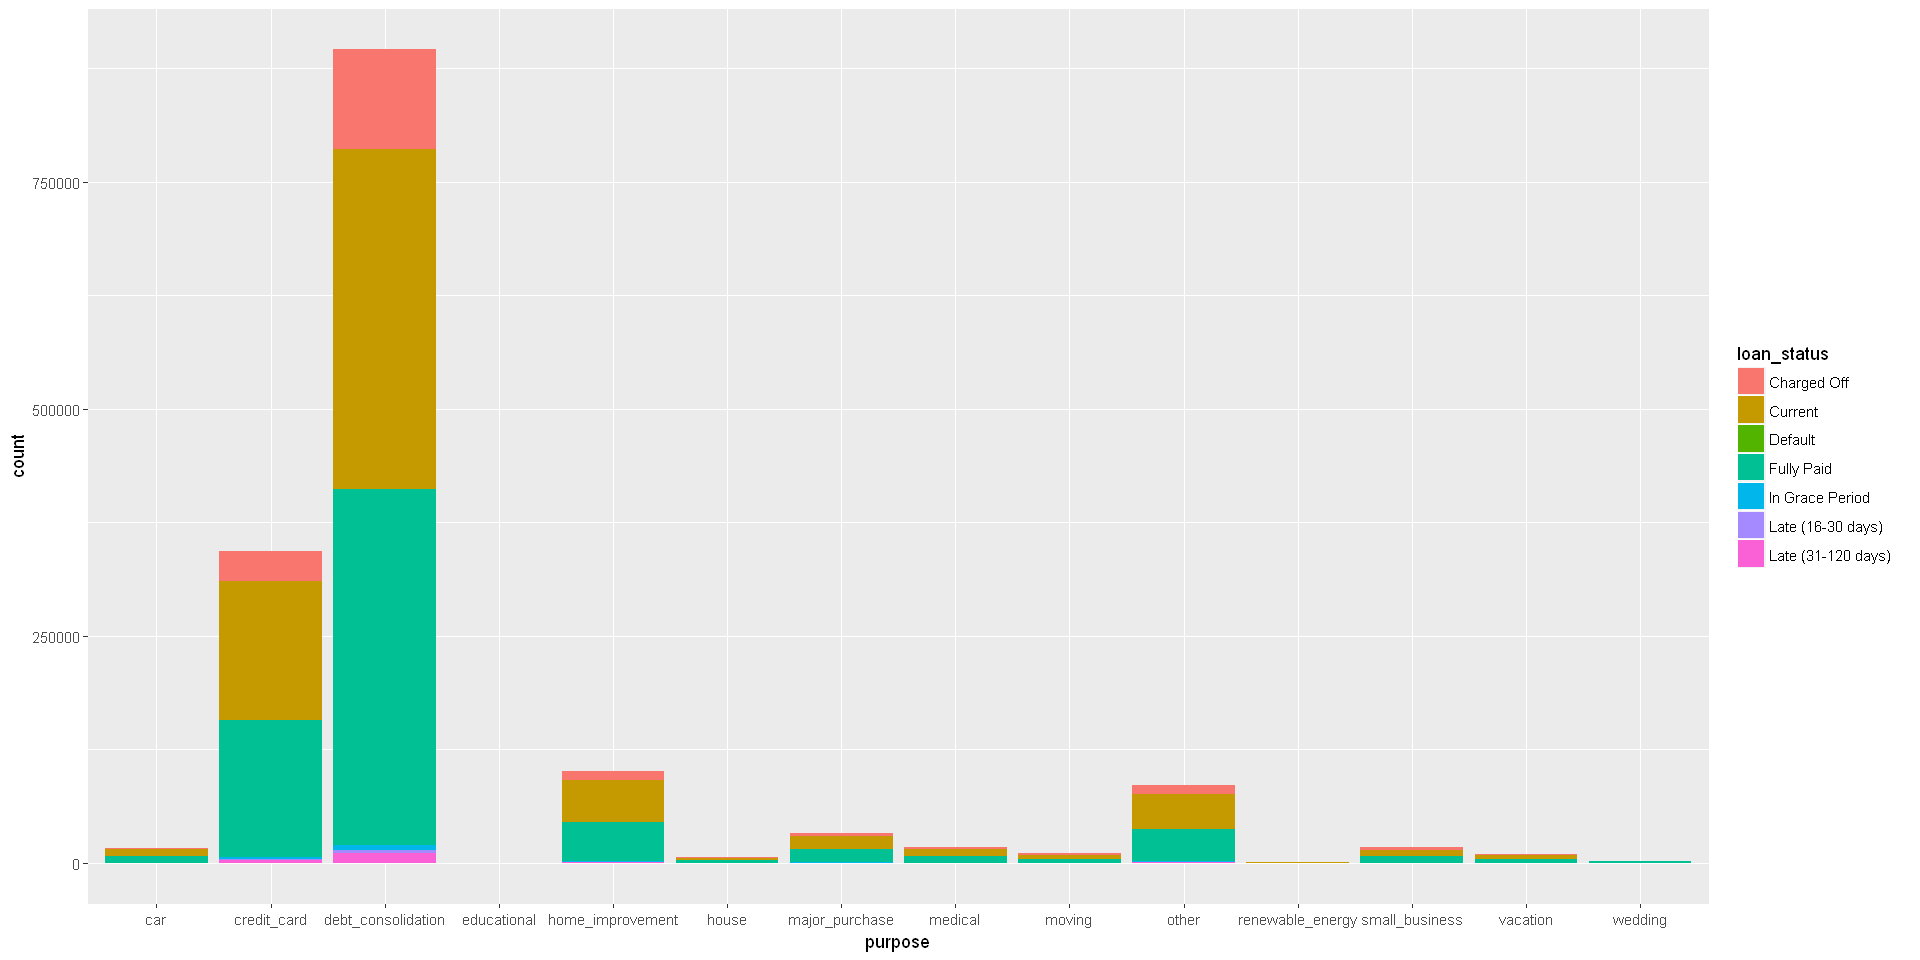

In [19]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(data = viz) + geom_bar(mapping = aes(x = purpose, fill = loan_status))

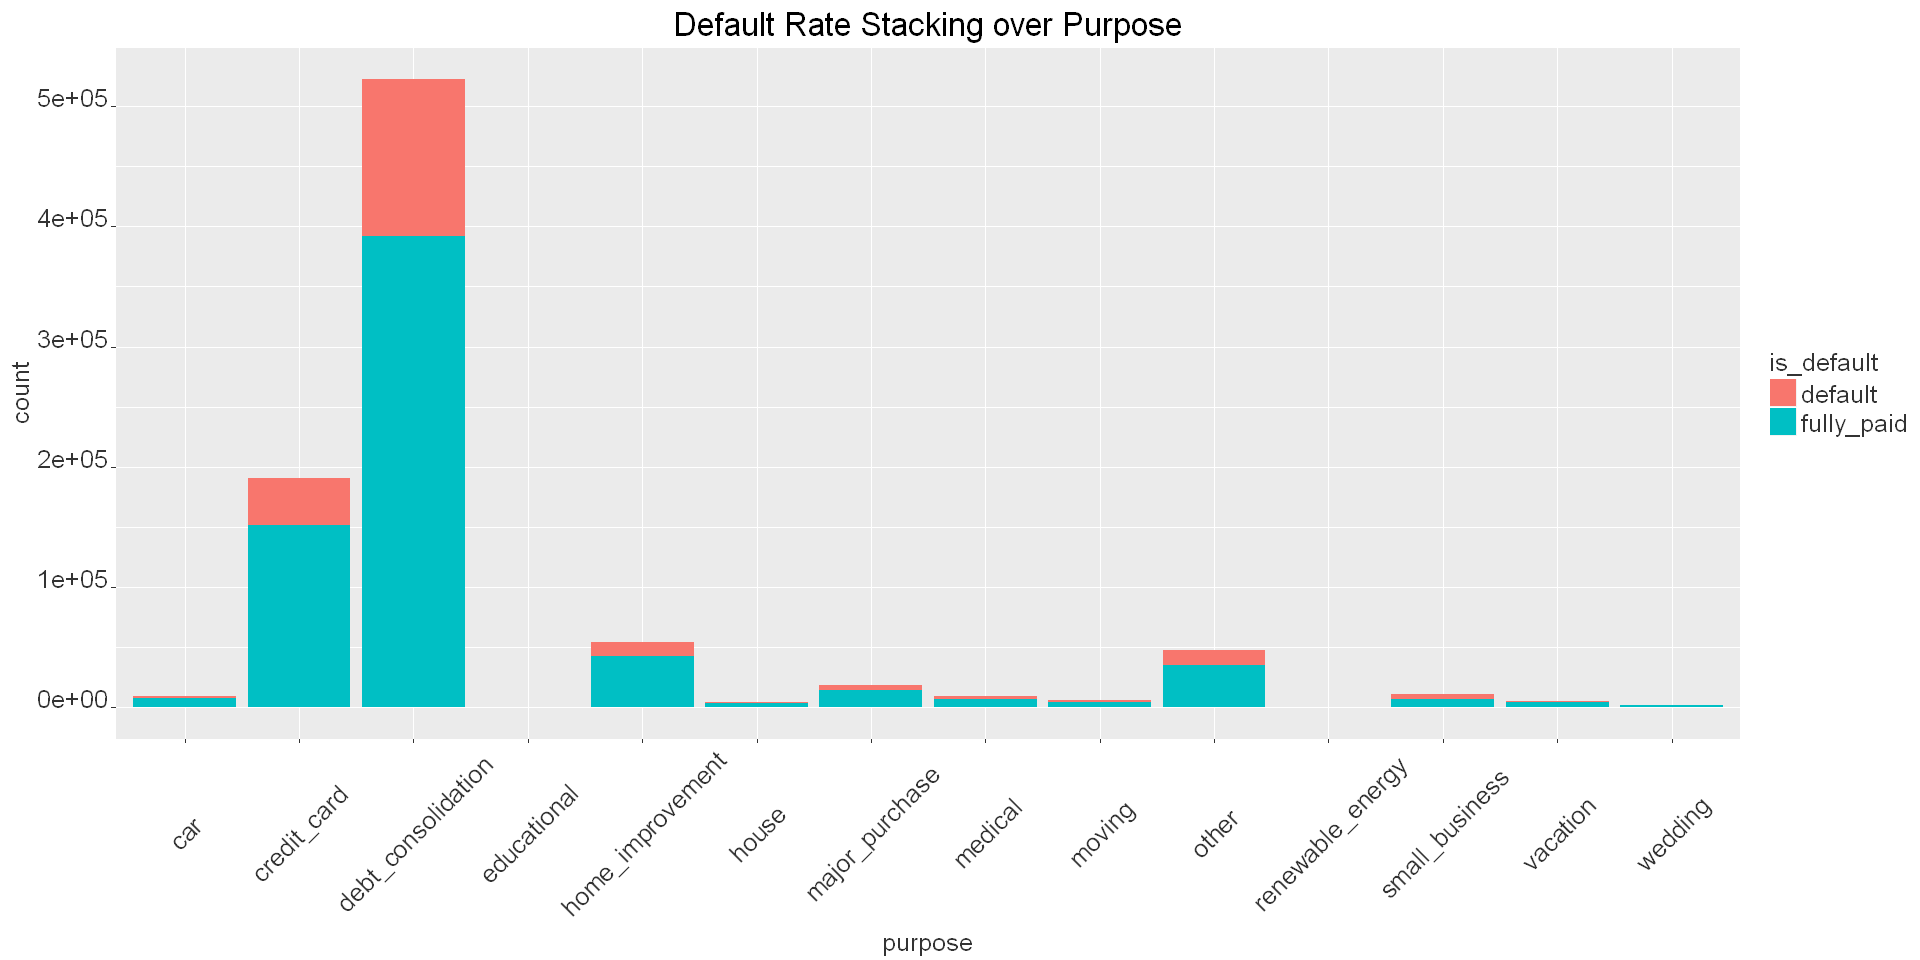

In [98]:
ggplot(data = viz2[order(viz2$is_default), ]) + geom_bar(mapping = aes(x = purpose, fill = is_default))+ 
ggtitle("Default Rate Stacking over Purpose")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

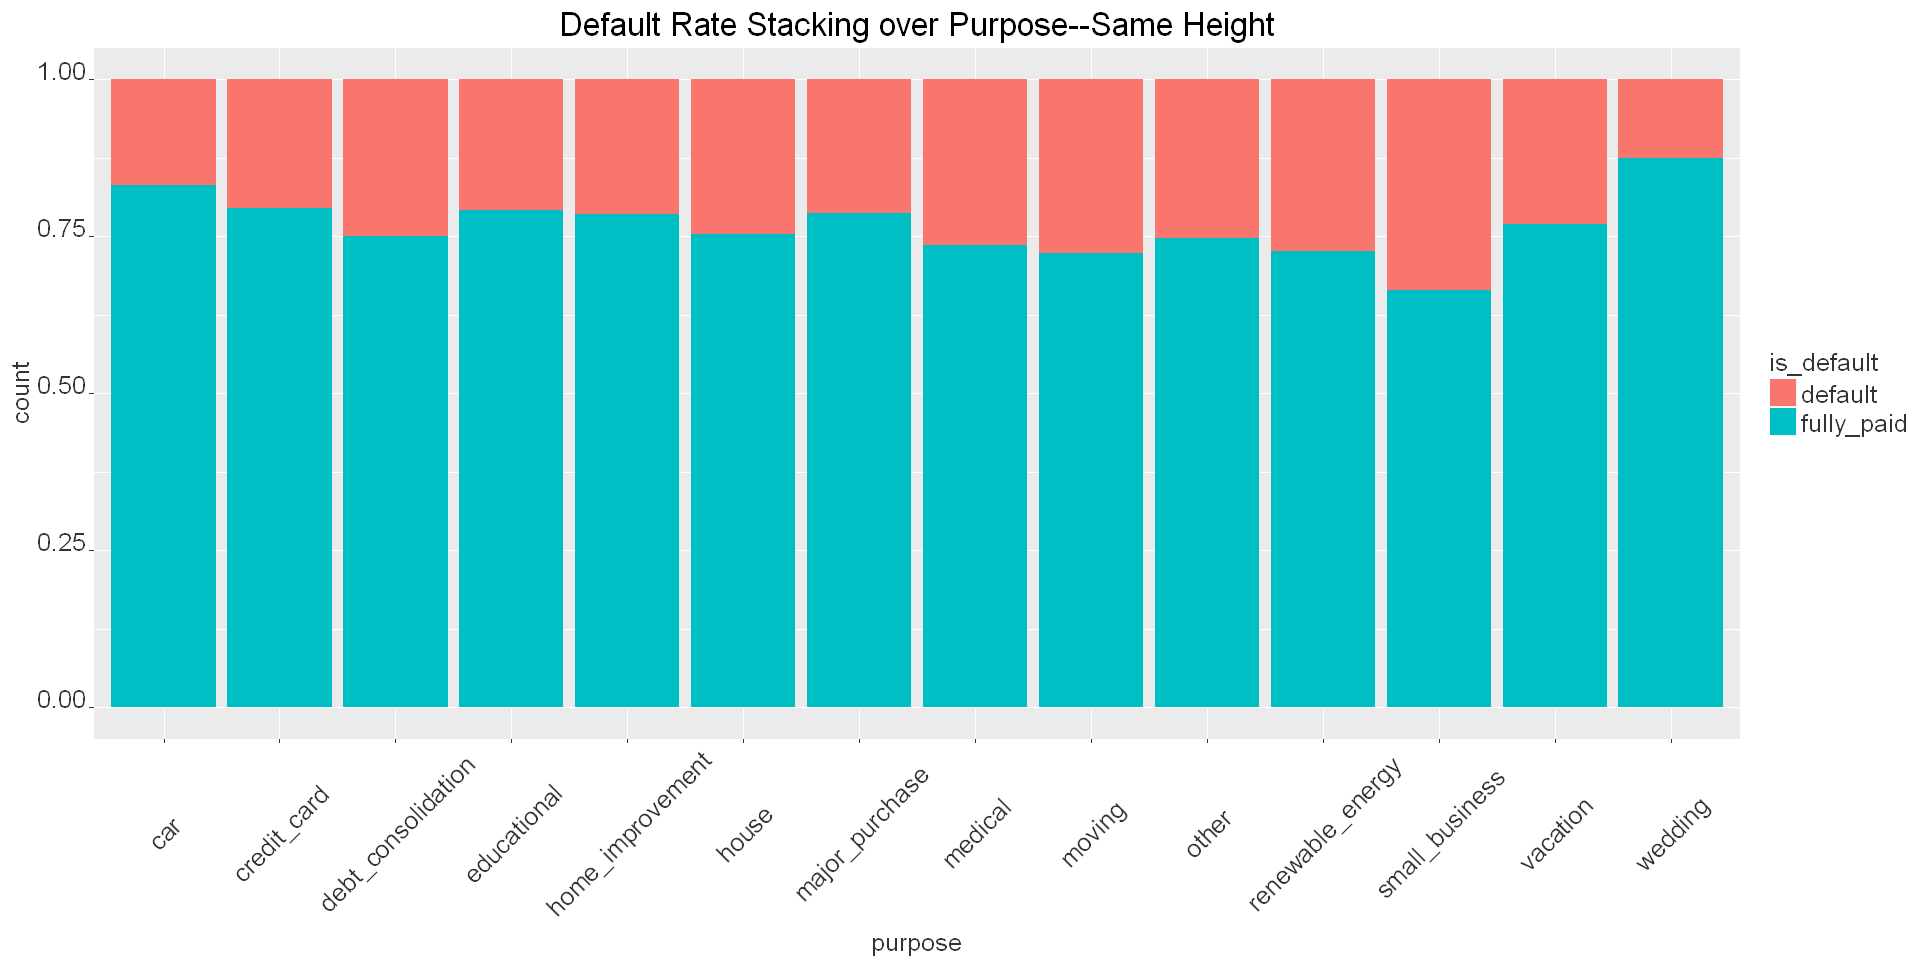

In [97]:
ggplot(data = viz2) + geom_bar(mapping = aes(x = purpose, fill = is_default), position = 'fill') + 
ggtitle("Default Rate Stacking over Purpose--Same Height")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

# default_homeownership

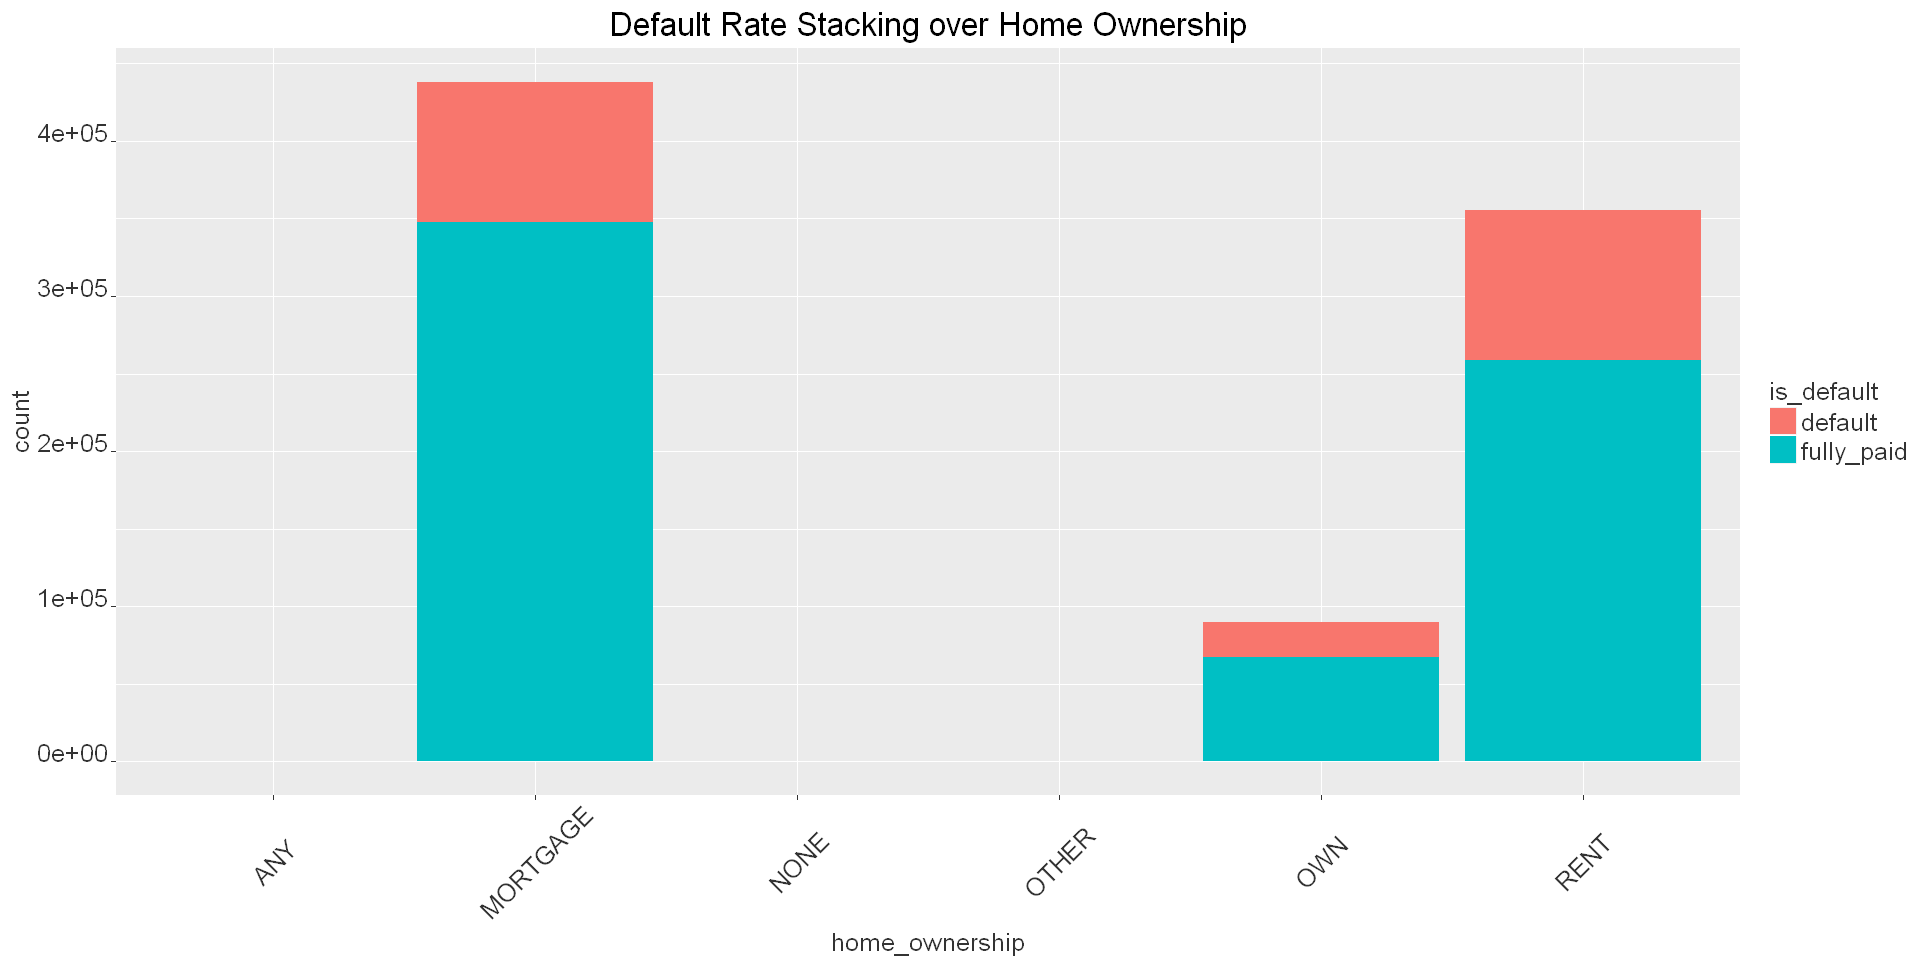

In [99]:
ggplot(data = viz2) + geom_bar(mapping = aes(x = home_ownership, fill = is_default))+ 
ggtitle("Default Rate Stacking over Home Ownership")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

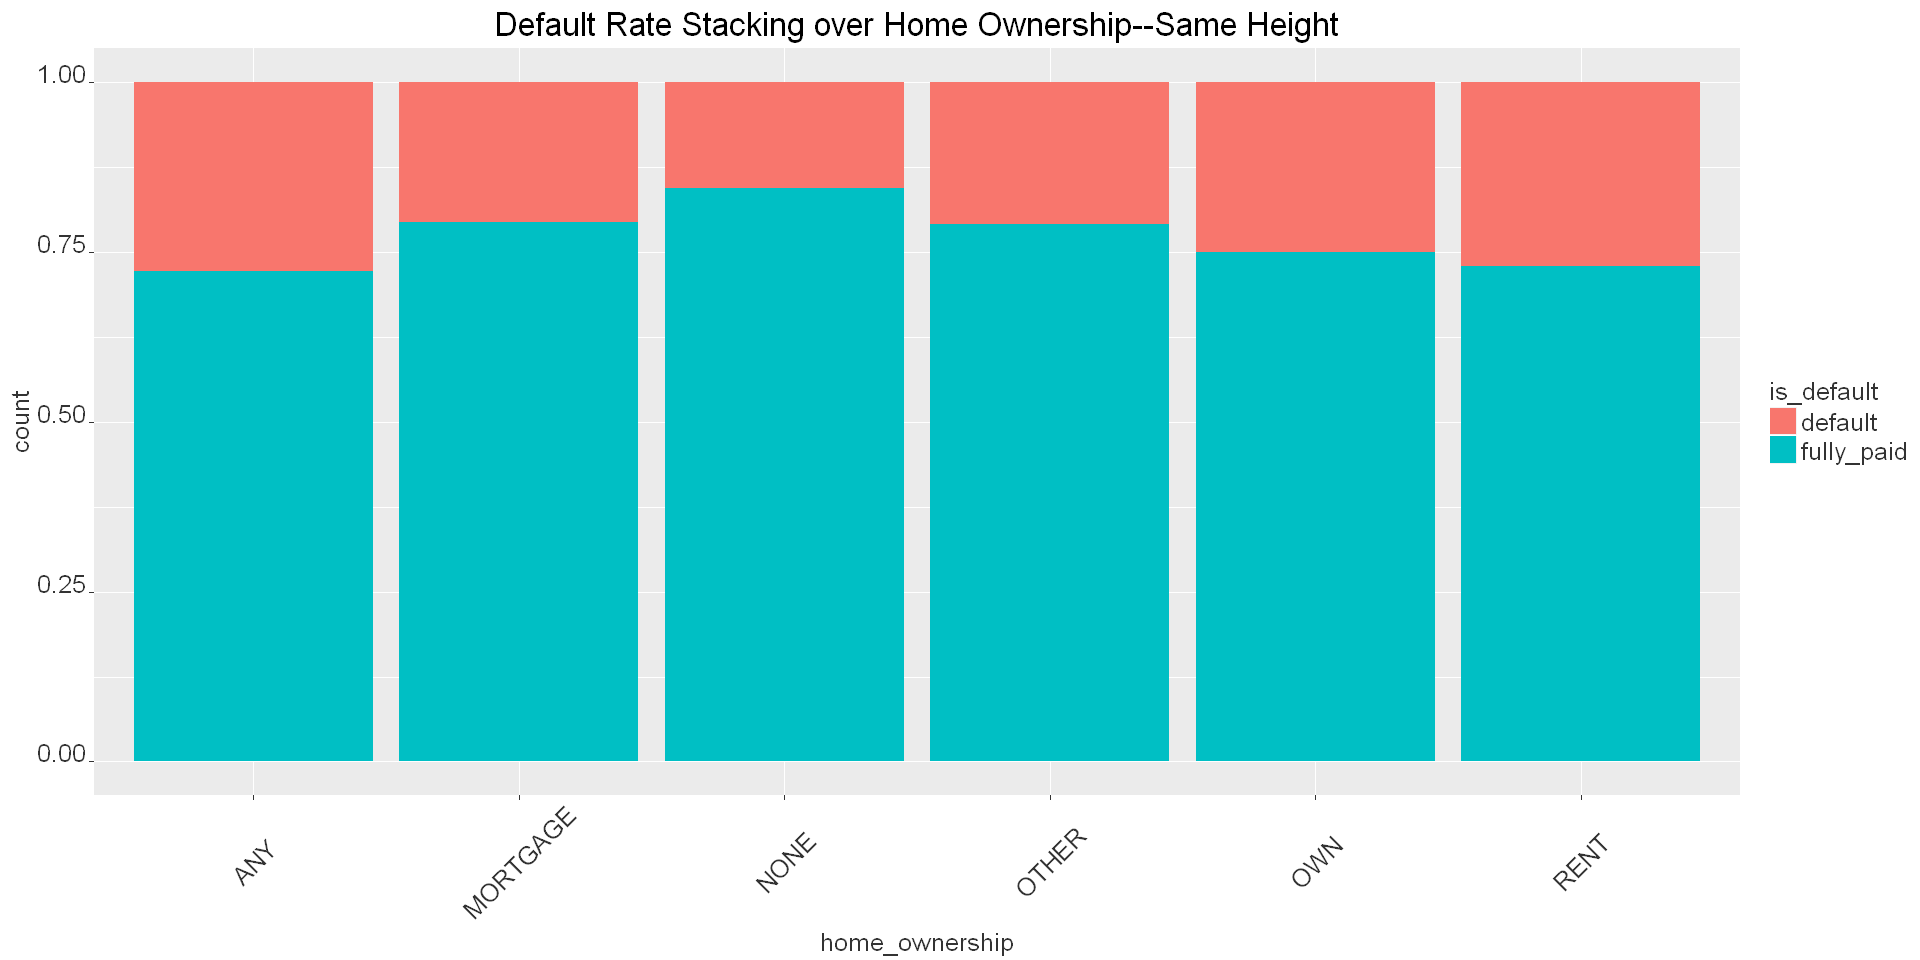

In [100]:
ggplot(data = viz2) + geom_bar(mapping = aes(x = home_ownership, fill = is_default), position = 'fill')+ 
ggtitle("Default Rate Stacking over Home Ownership--Same Height")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

# Annual Income

In [56]:
str(viz2$annual_inc)

 num [1:883424] 24000 30000 12252 49200 80000 ...


In [57]:
str(viz2$grade)

 chr [1:883424] "B" "C" "C" "C" "B" "A" "C" "E" "F" "B" "C" "B" "C" "B" "B" ...


Warning message:
"`position` is deprecated"Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."

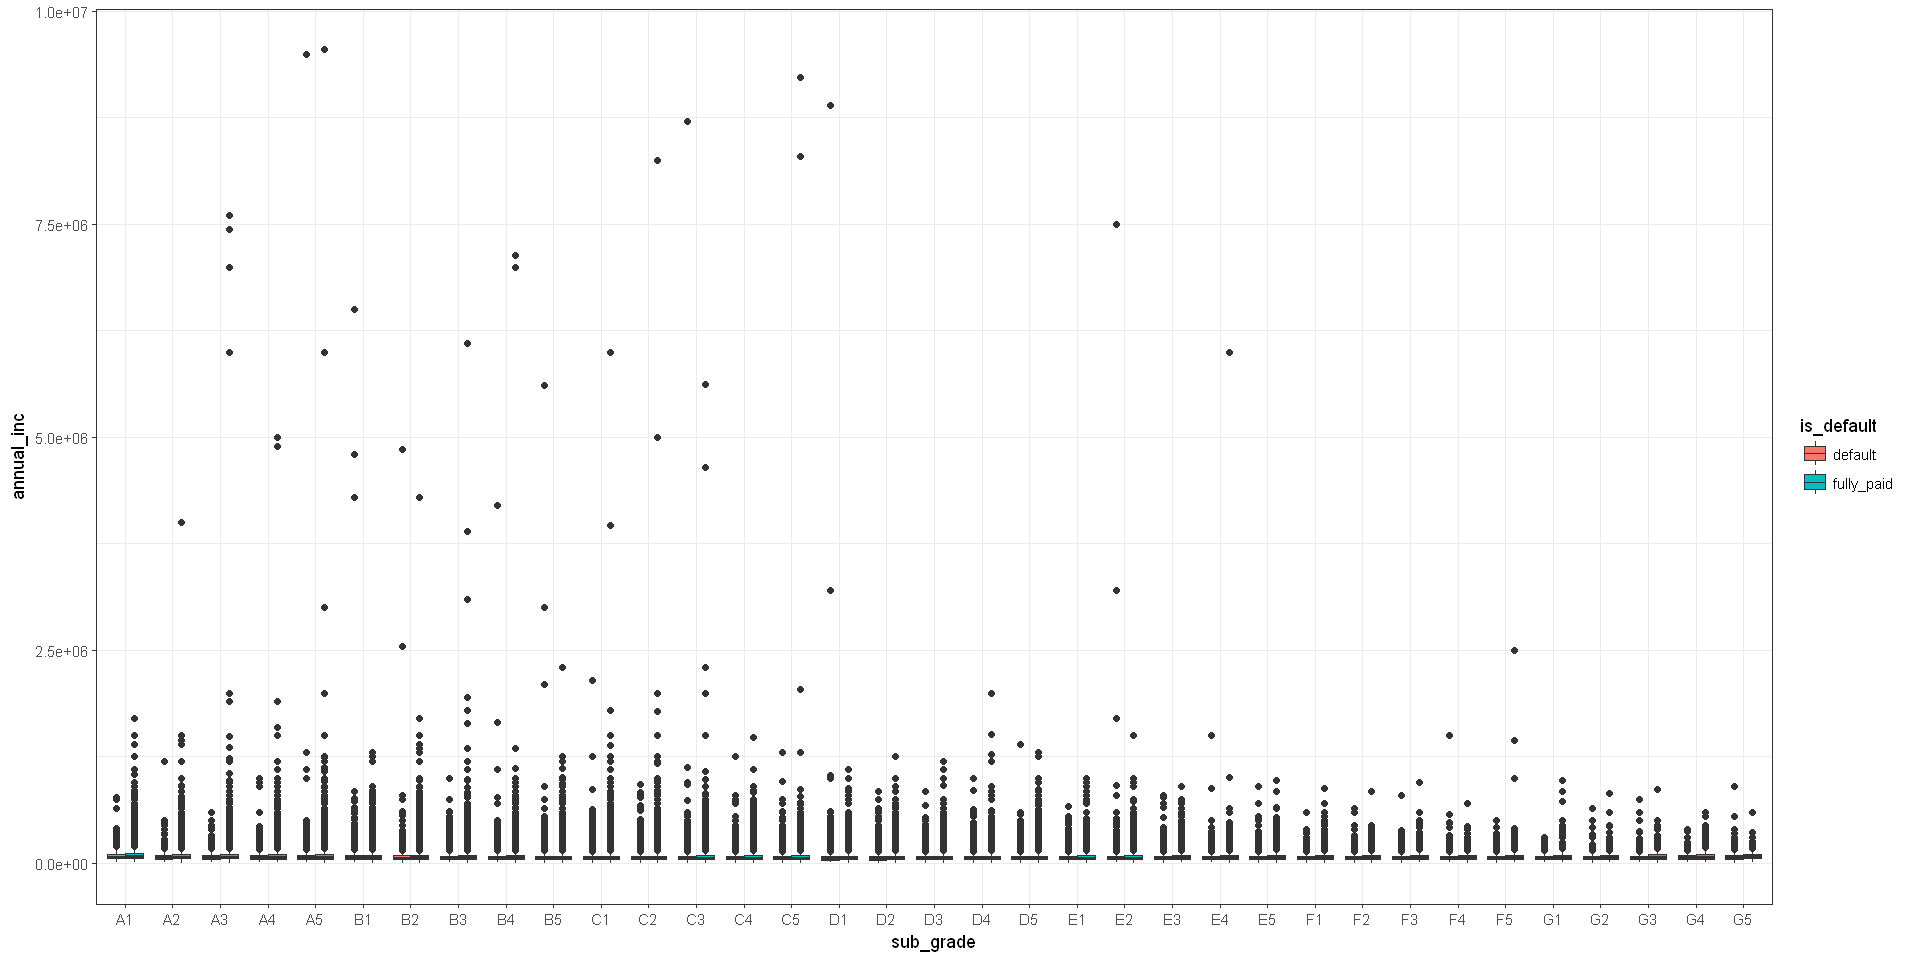

In [65]:
qplot(sub_grade, annual_inc, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()

Not Obvious Relationship

In [64]:
head(viz2$sub_grade)

[1] "B2" "C4" "C5" "C1" "B5" "A4"

Warning message:
"`position` is deprecated"

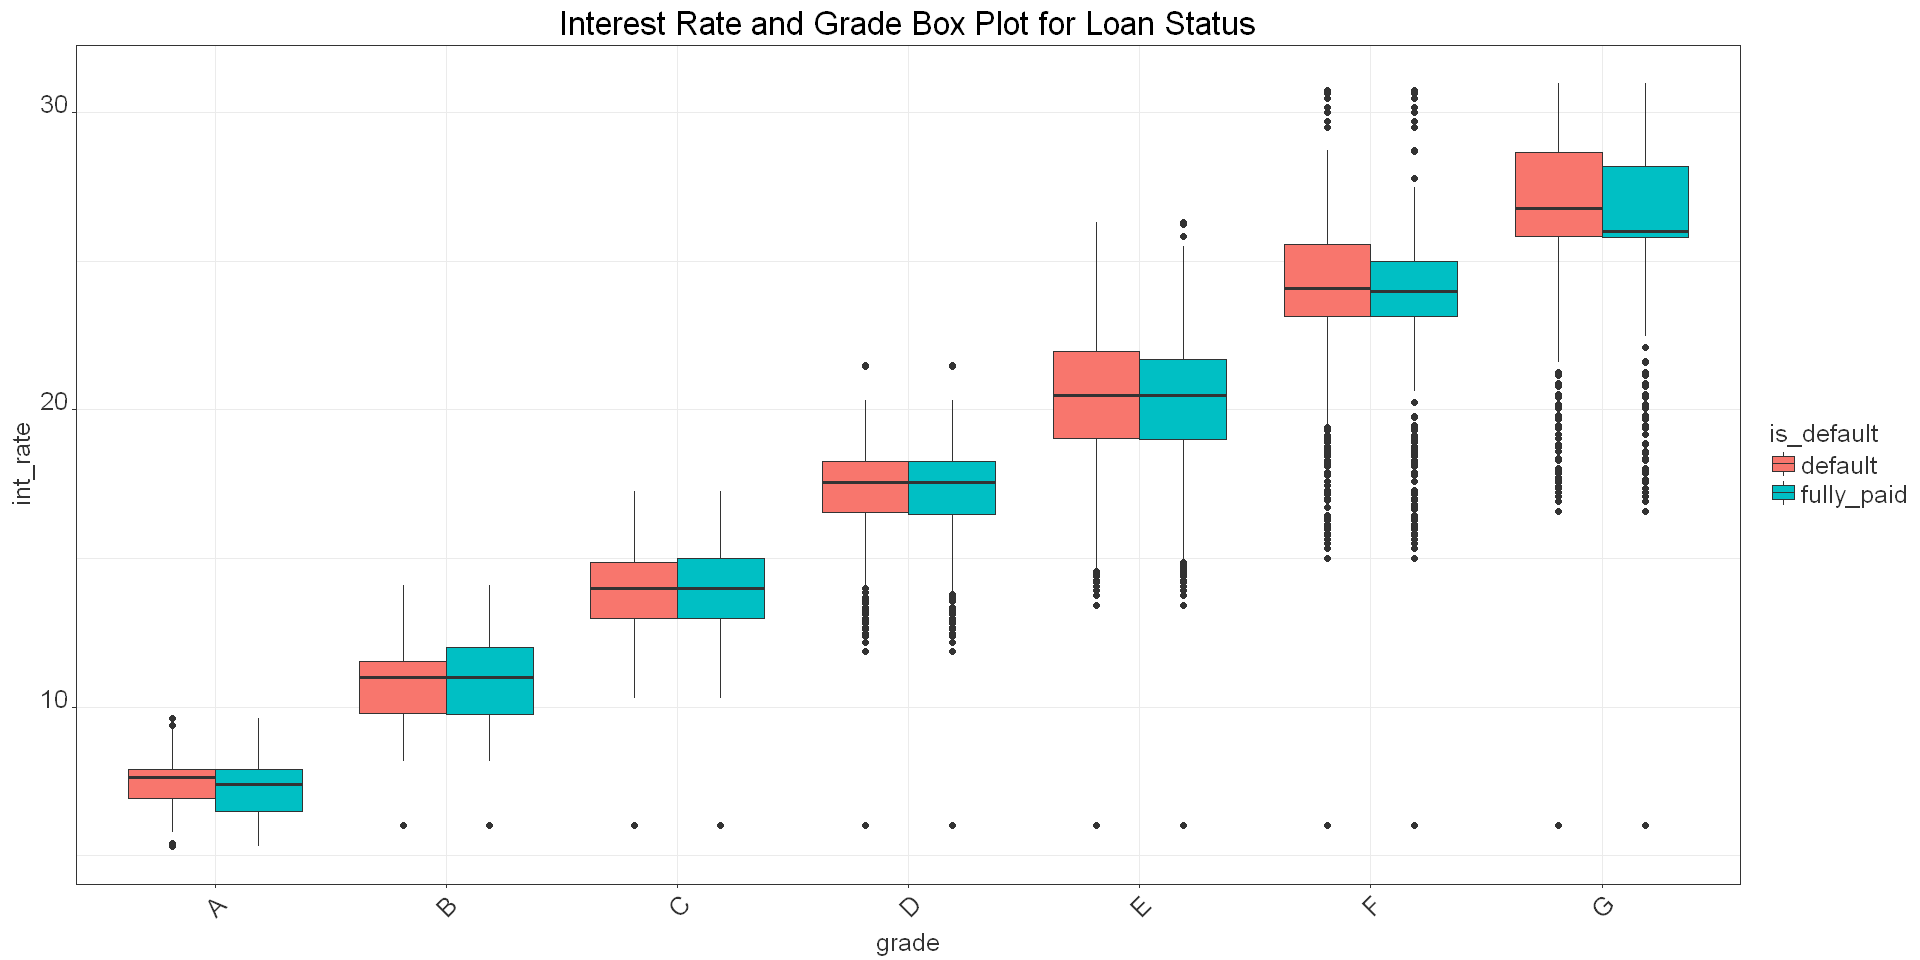

In [101]:
qplot(grade, int_rate, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()+ 
ggtitle("Interest Rate and Grade Box Plot for Loan Status")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

In [ ]:
#try not put grade in the model

# Annual Income

In [ ]:
# qplot(is_default, annual_inc, data=viz2, geom="boxplot", position="dodge")+theme_bw()

# Term

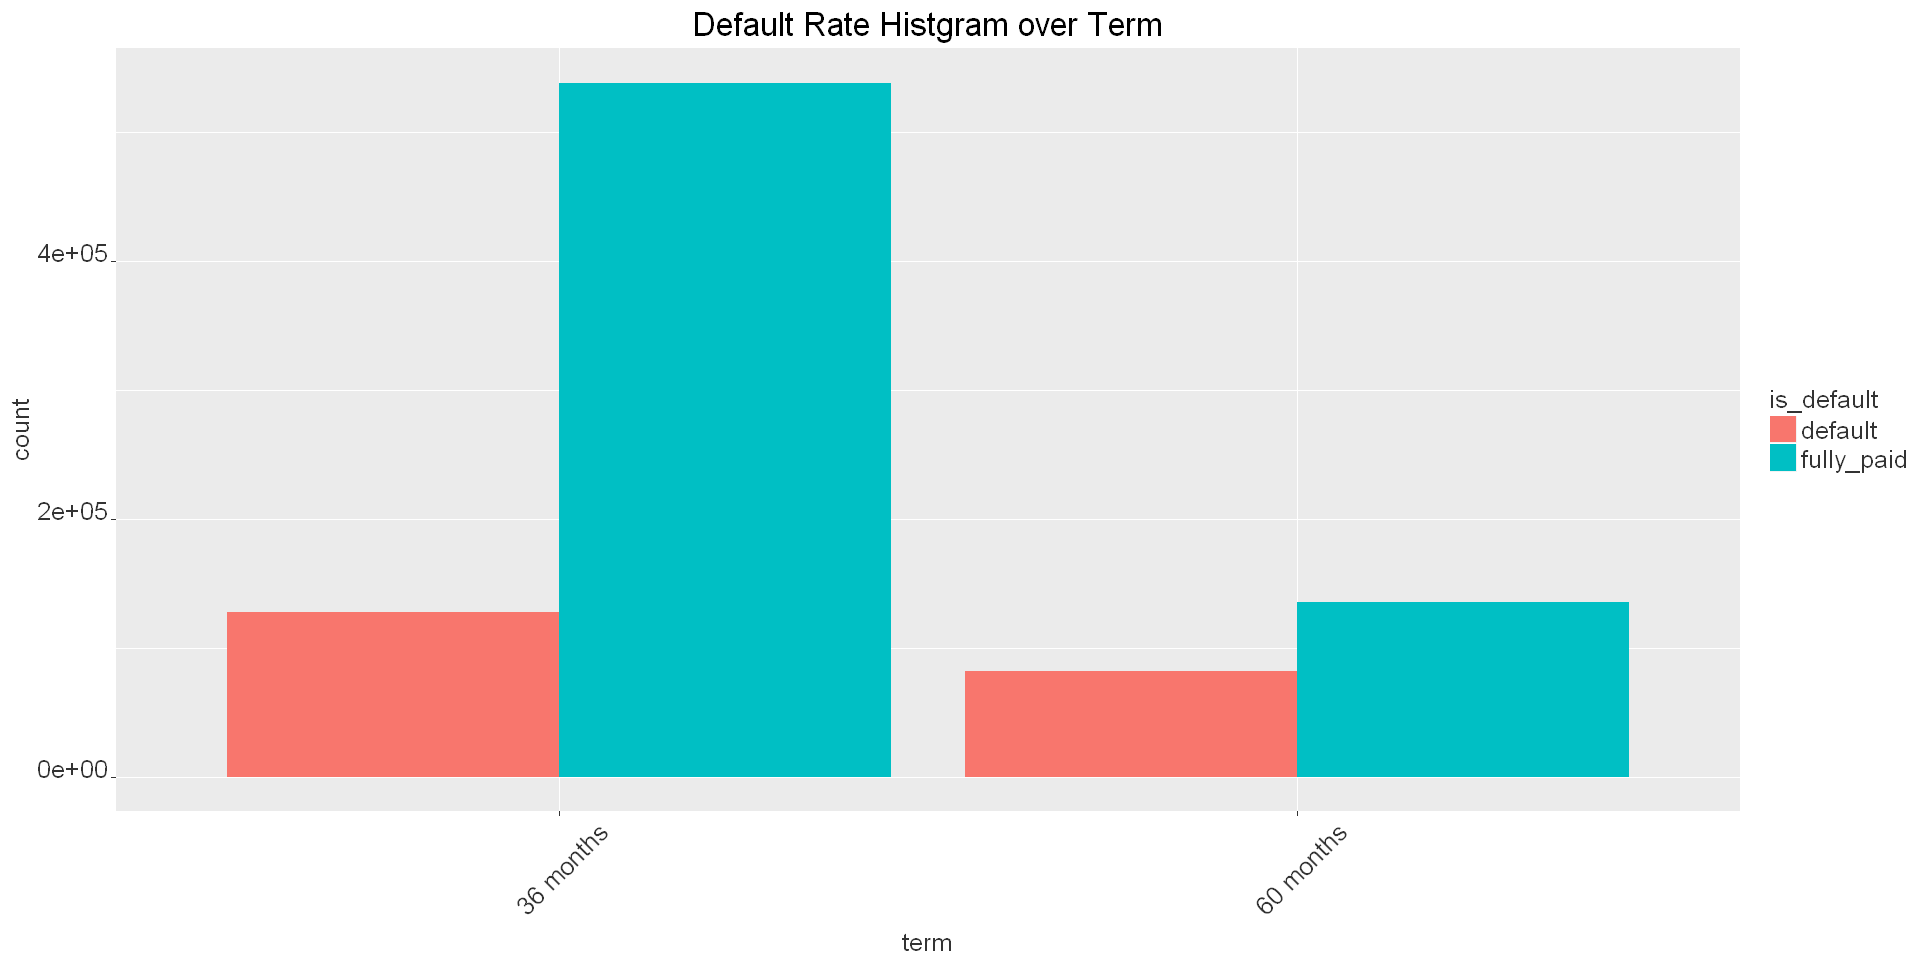

In [109]:
ggplot(data = viz2) + geom_bar(mapping = aes(x = term, fill = is_default),position = 'dodge')+ 
ggtitle("Default Rate Histgram over Term")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

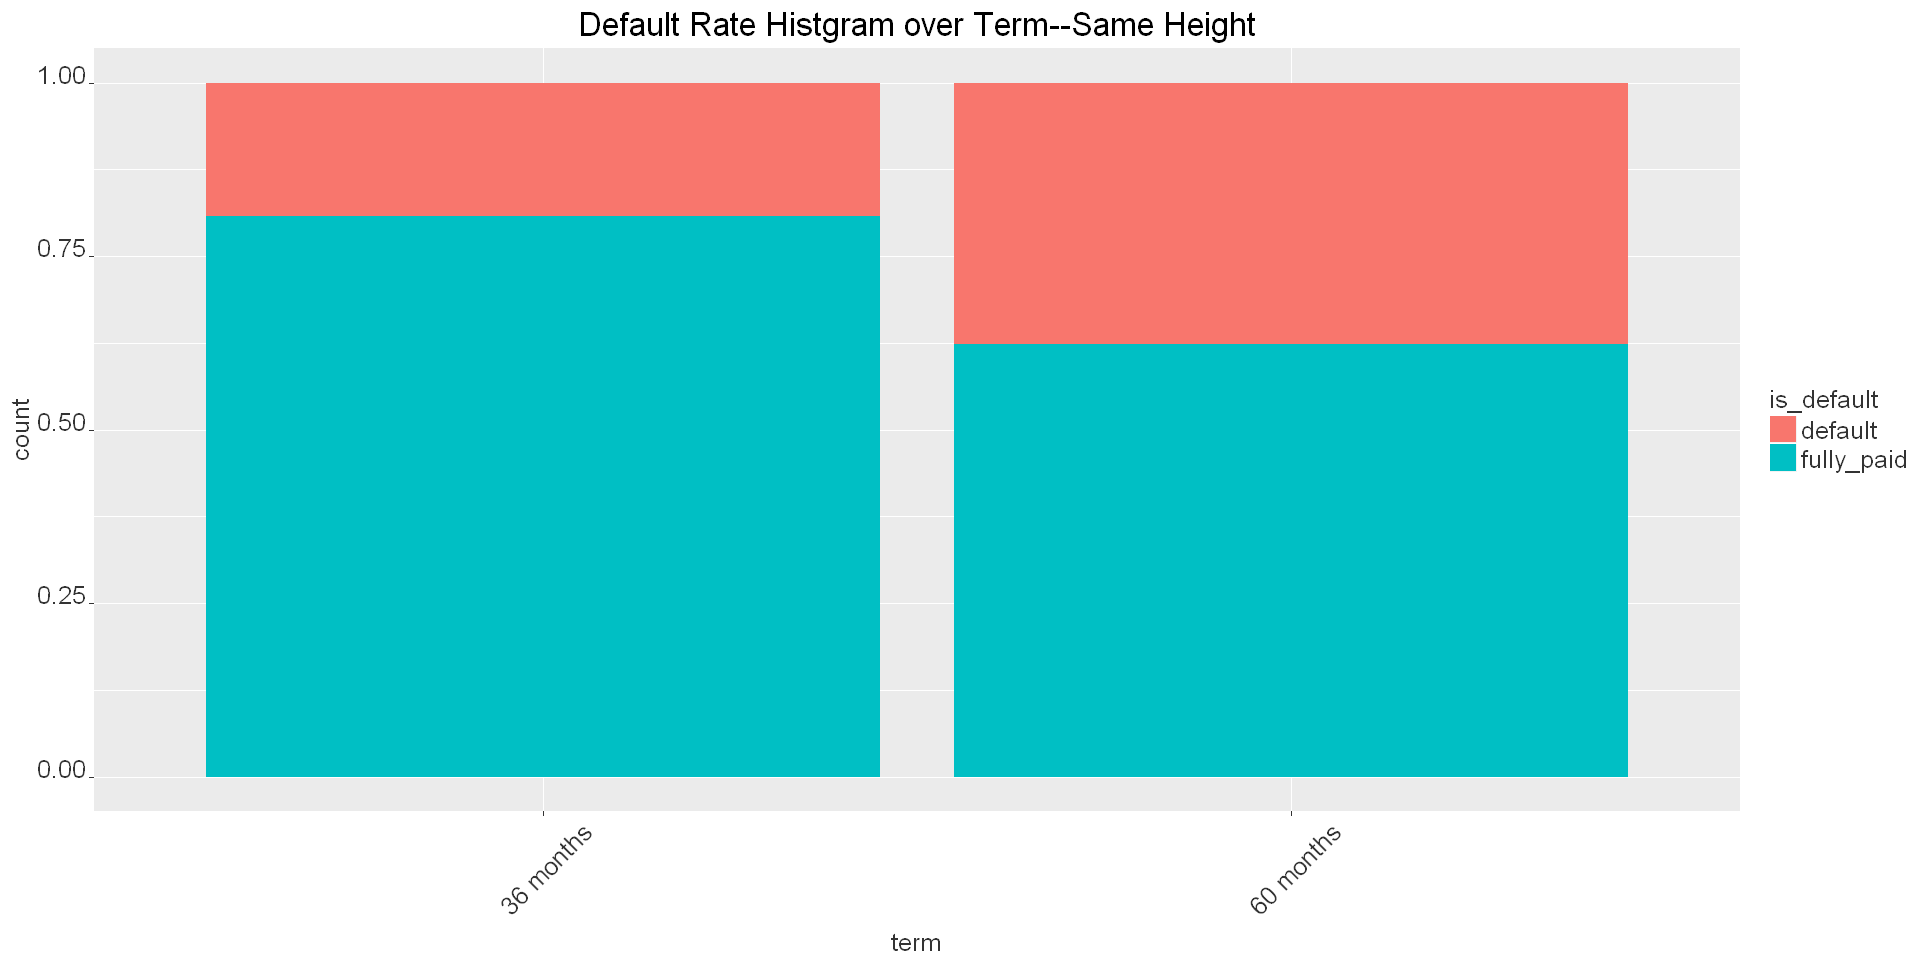

In [110]:
ggplot(data = viz2) + geom_bar(mapping = aes(x = term, fill = is_default), position = 'fill')+ 
ggtitle("Default Rate Histgram over Term--Same Height")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

# Dti

Warning message:
"`position` is deprecated"Warning message:
"Removed 53 rows containing non-finite values (stat_boxplot)."

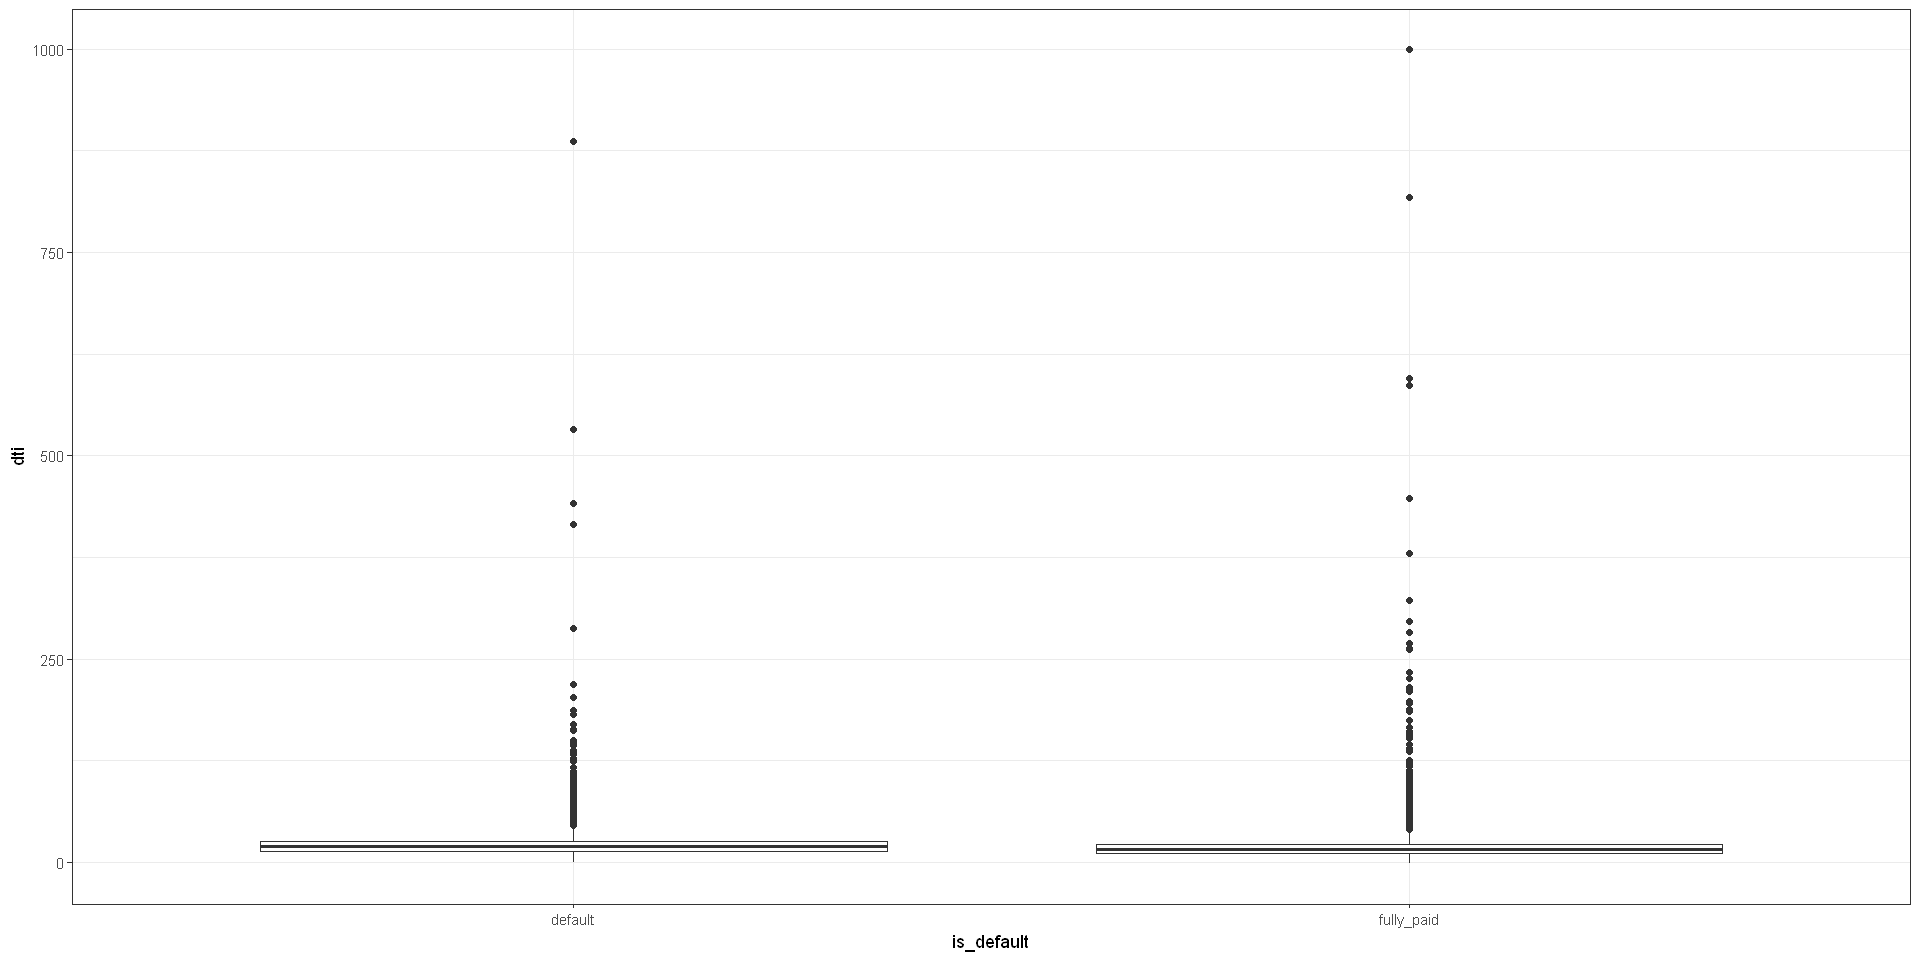

In [67]:
qplot(is_default, dti, data=viz2, geom="boxplot", position="dodge")+theme_bw()

Warning message:
"`position` is deprecated"Warning message:
"Removed 53 rows containing non-finite values (stat_boxplot)."

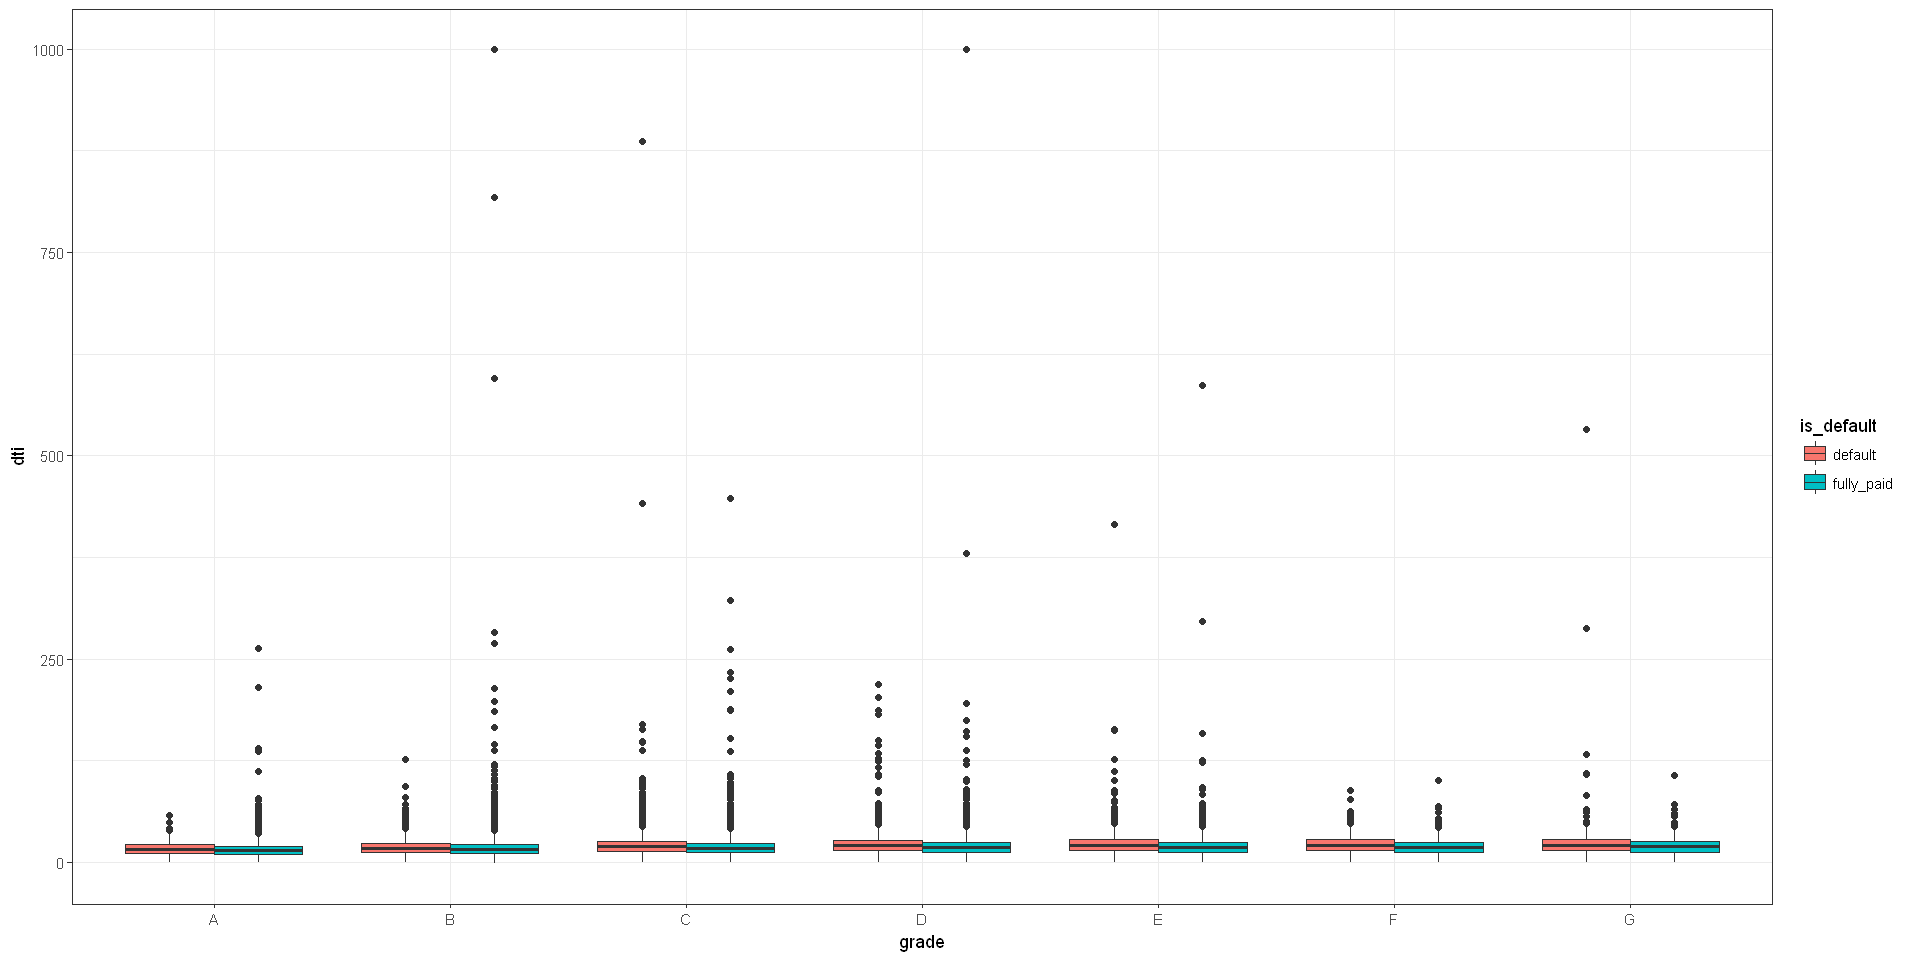

In [68]:
qplot(grade, dti, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()

# Fico_range_high

Warning message:
"`position` is deprecated"Warning message:
"Removed 191828 rows containing non-finite values (stat_boxplot)."

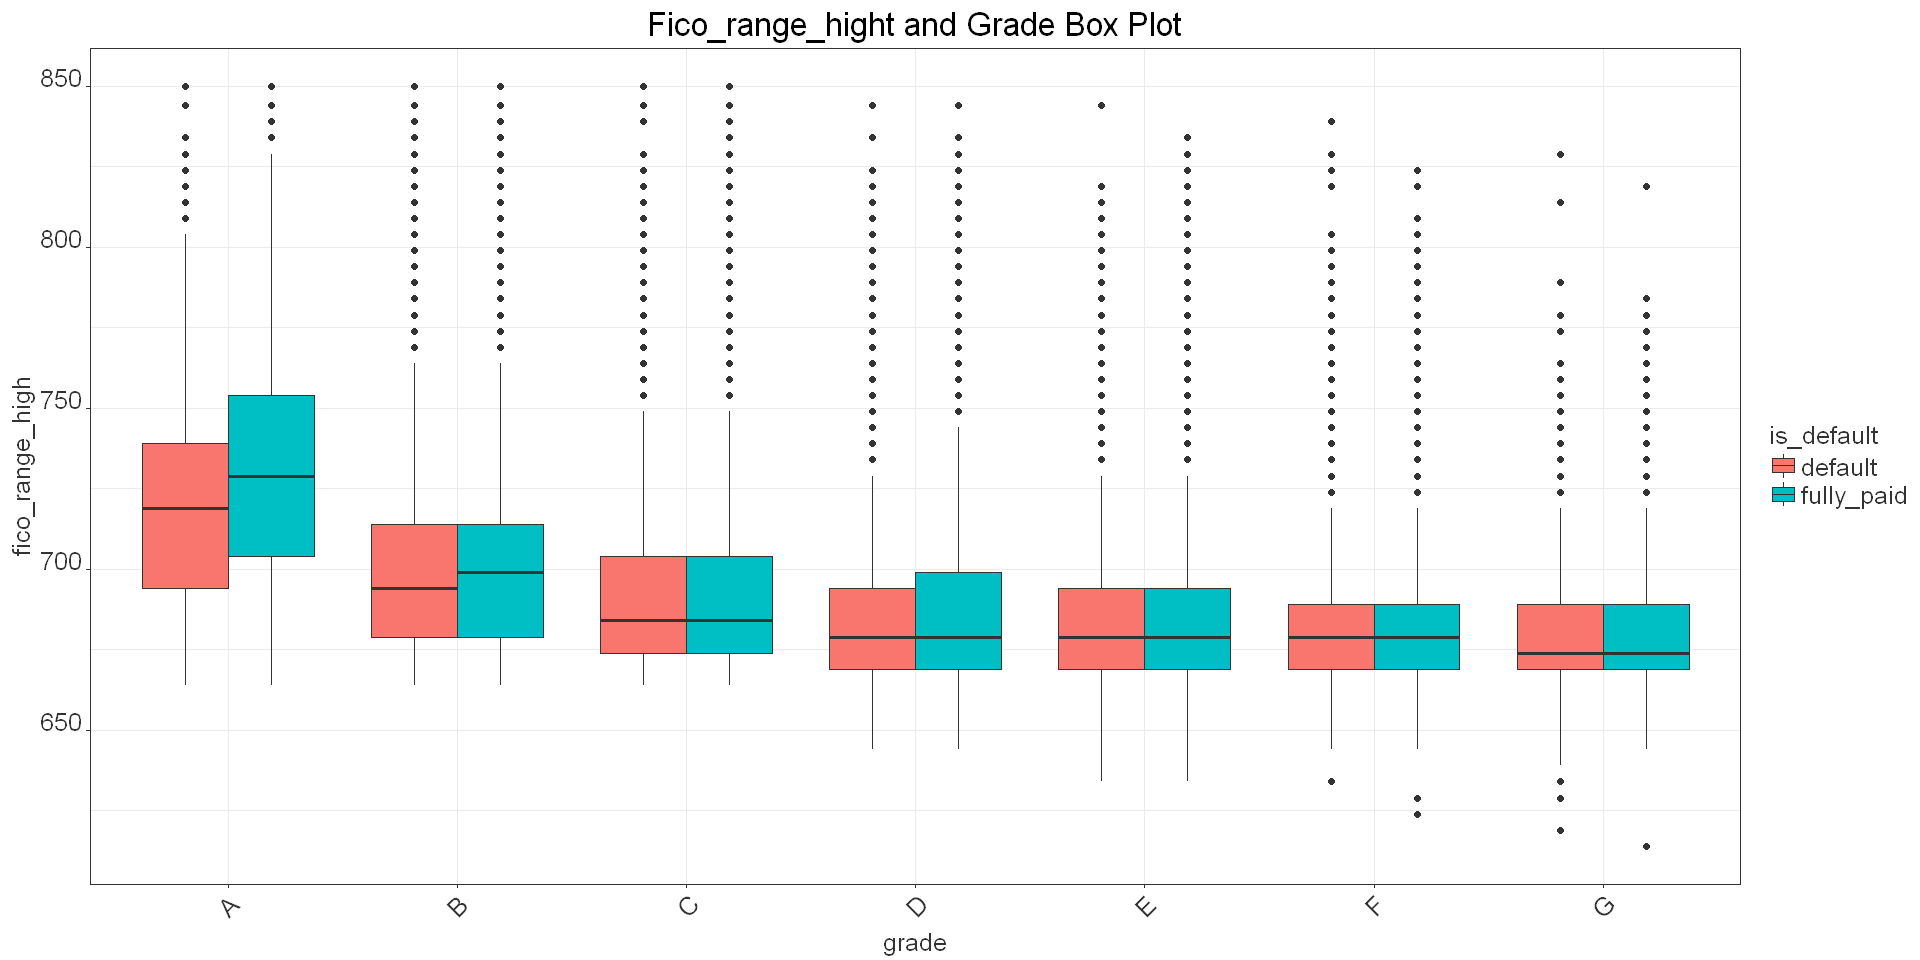

In [102]:
qplot(grade, fico_range_high, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()+ 
ggtitle("Fico_range_hight and Grade Box Plot")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

Warning message:
"`position` is deprecated"Warning message:
"Removed 191828 rows containing non-finite values (stat_boxplot)."

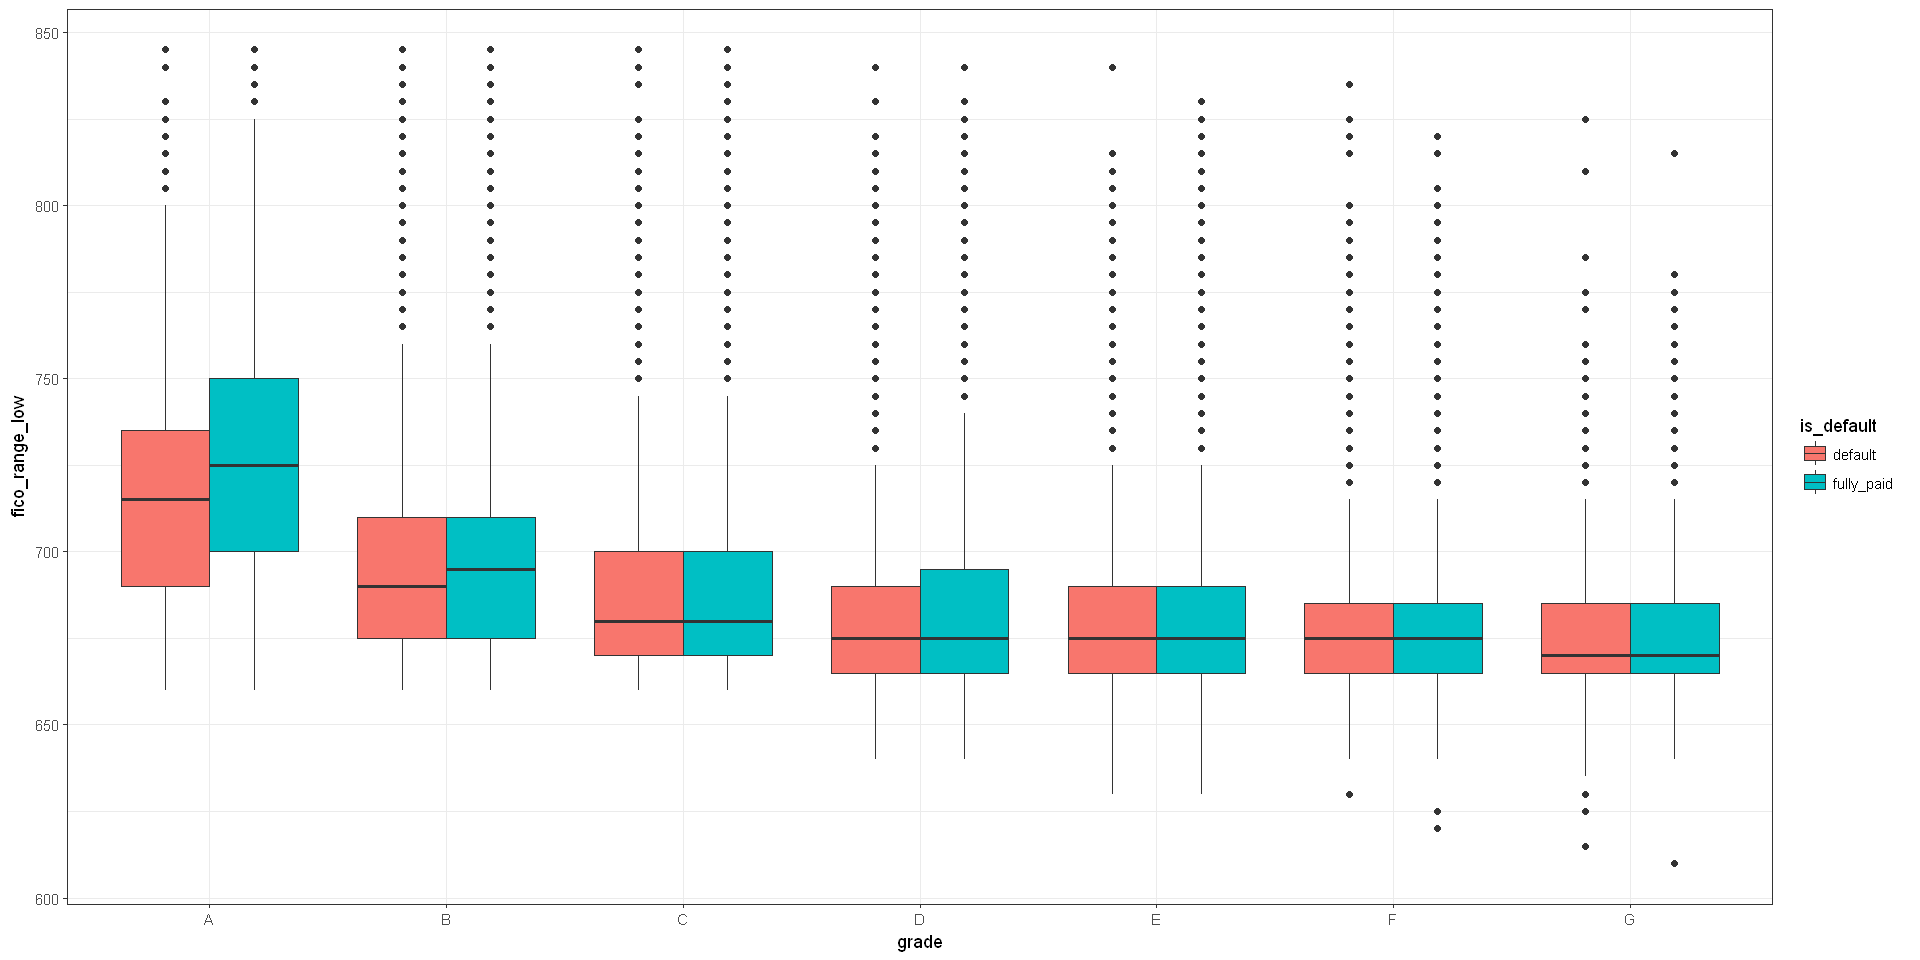

In [70]:
qplot(grade, fico_range_low, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()

In [103]:
#Not obvious difference between fico_range_high and fico_range_low

Warning message:
"`position` is deprecated"Warning message:
"Removed 191828 rows containing non-finite values (stat_boxplot)."

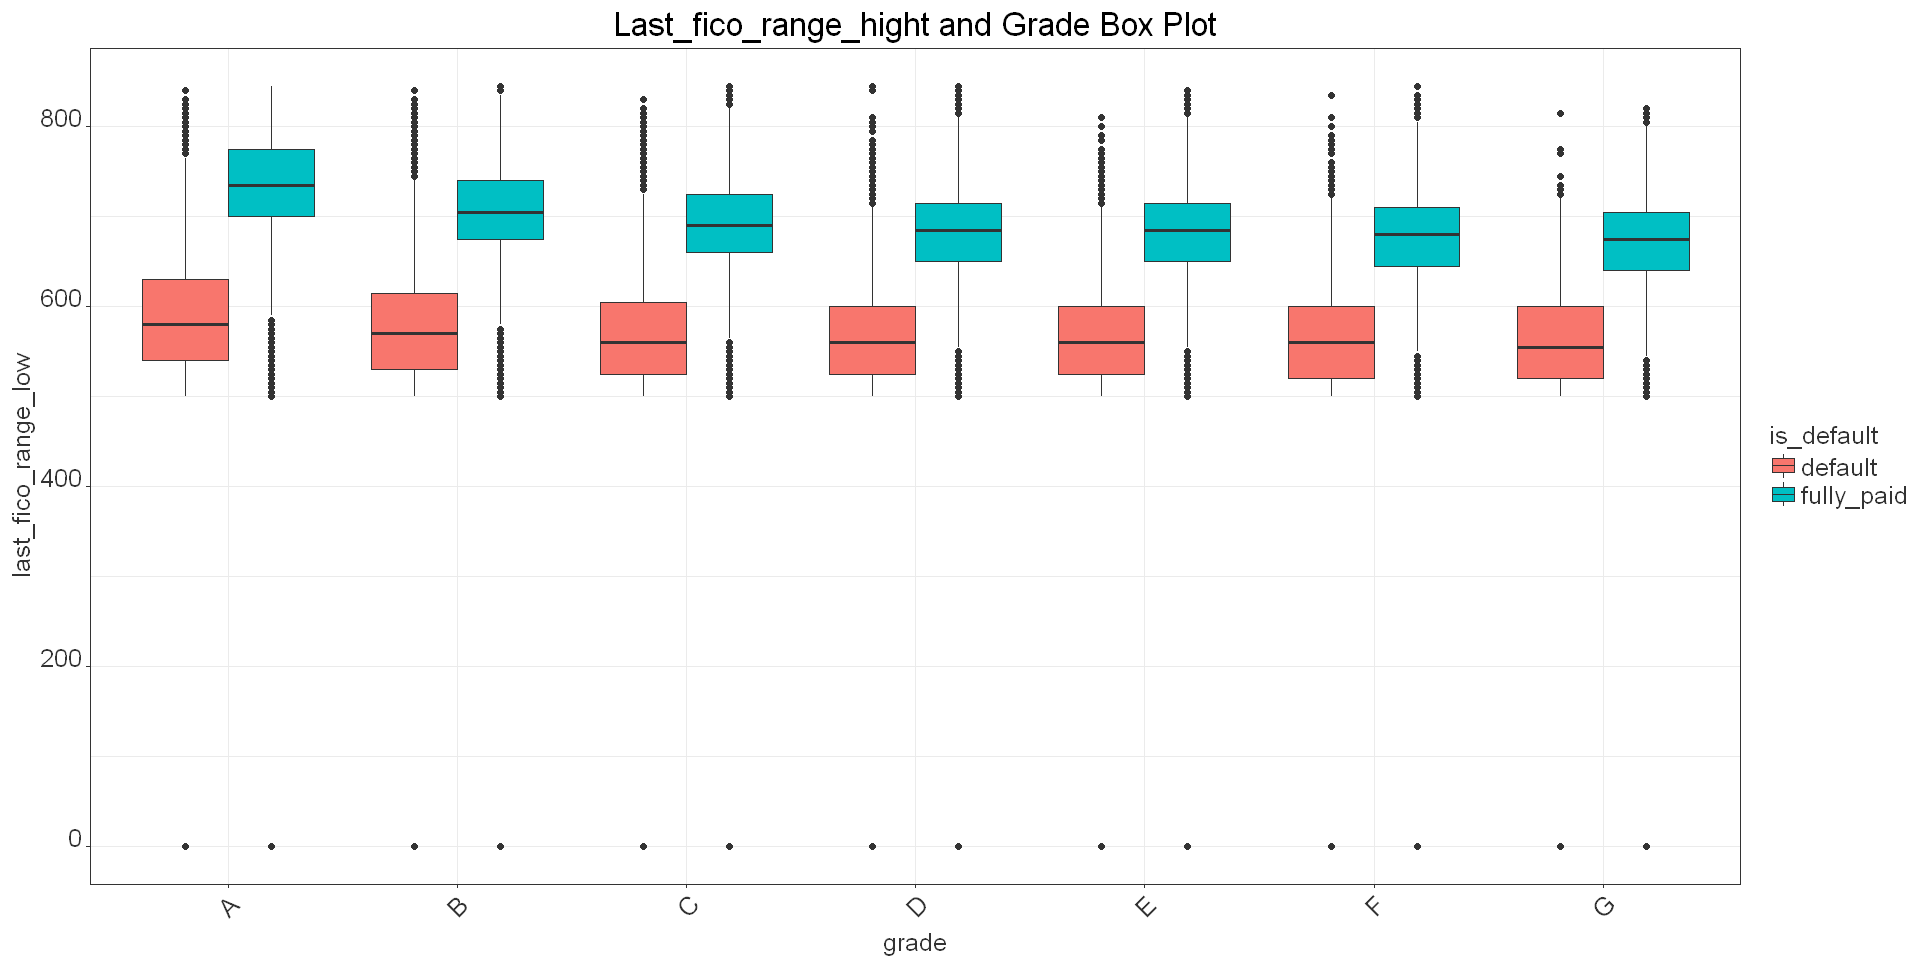

In [106]:
qplot(grade, last_fico_range_low, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()+ 
ggtitle("Last_fico_range_hight and Grade Box Plot")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))

# loan_amount

Warning message:
"`position` is deprecated"

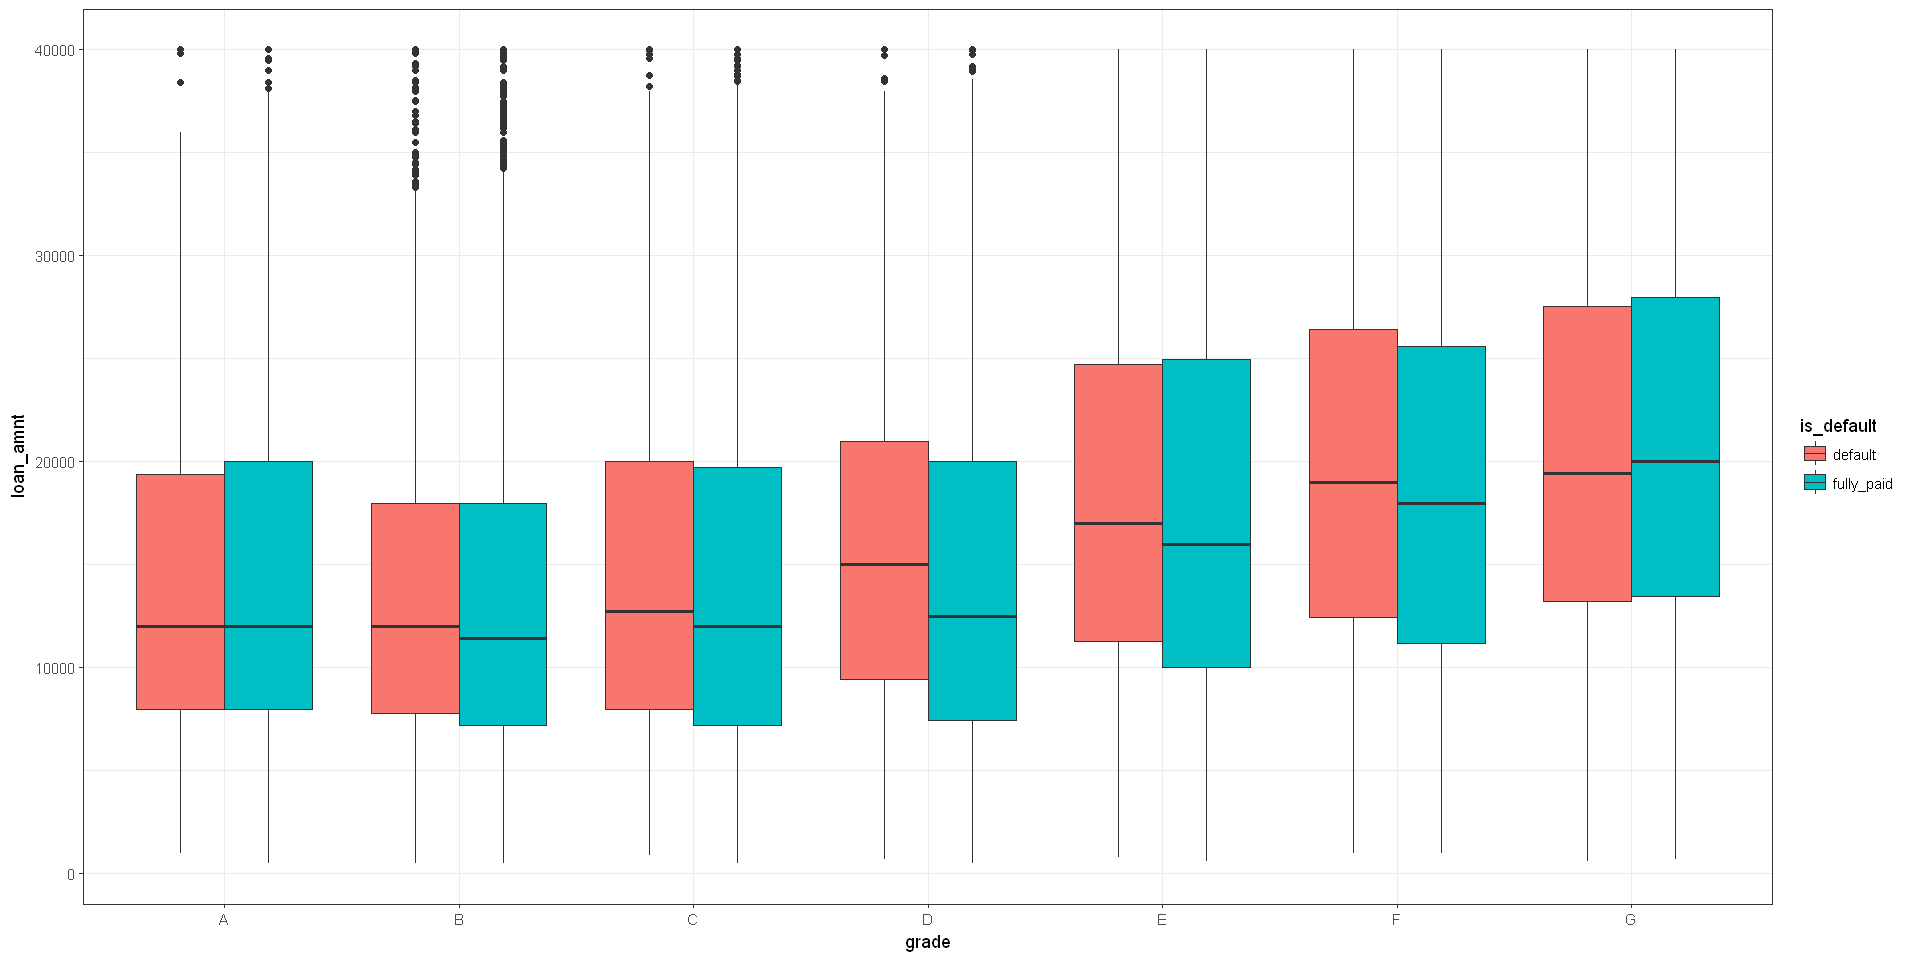

In [72]:
qplot(grade, loan_amnt, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()+ 
ggtitle("Loan Amount and Grade Box Plot")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain")

# Installment

Warning message:
"`position` is deprecated"

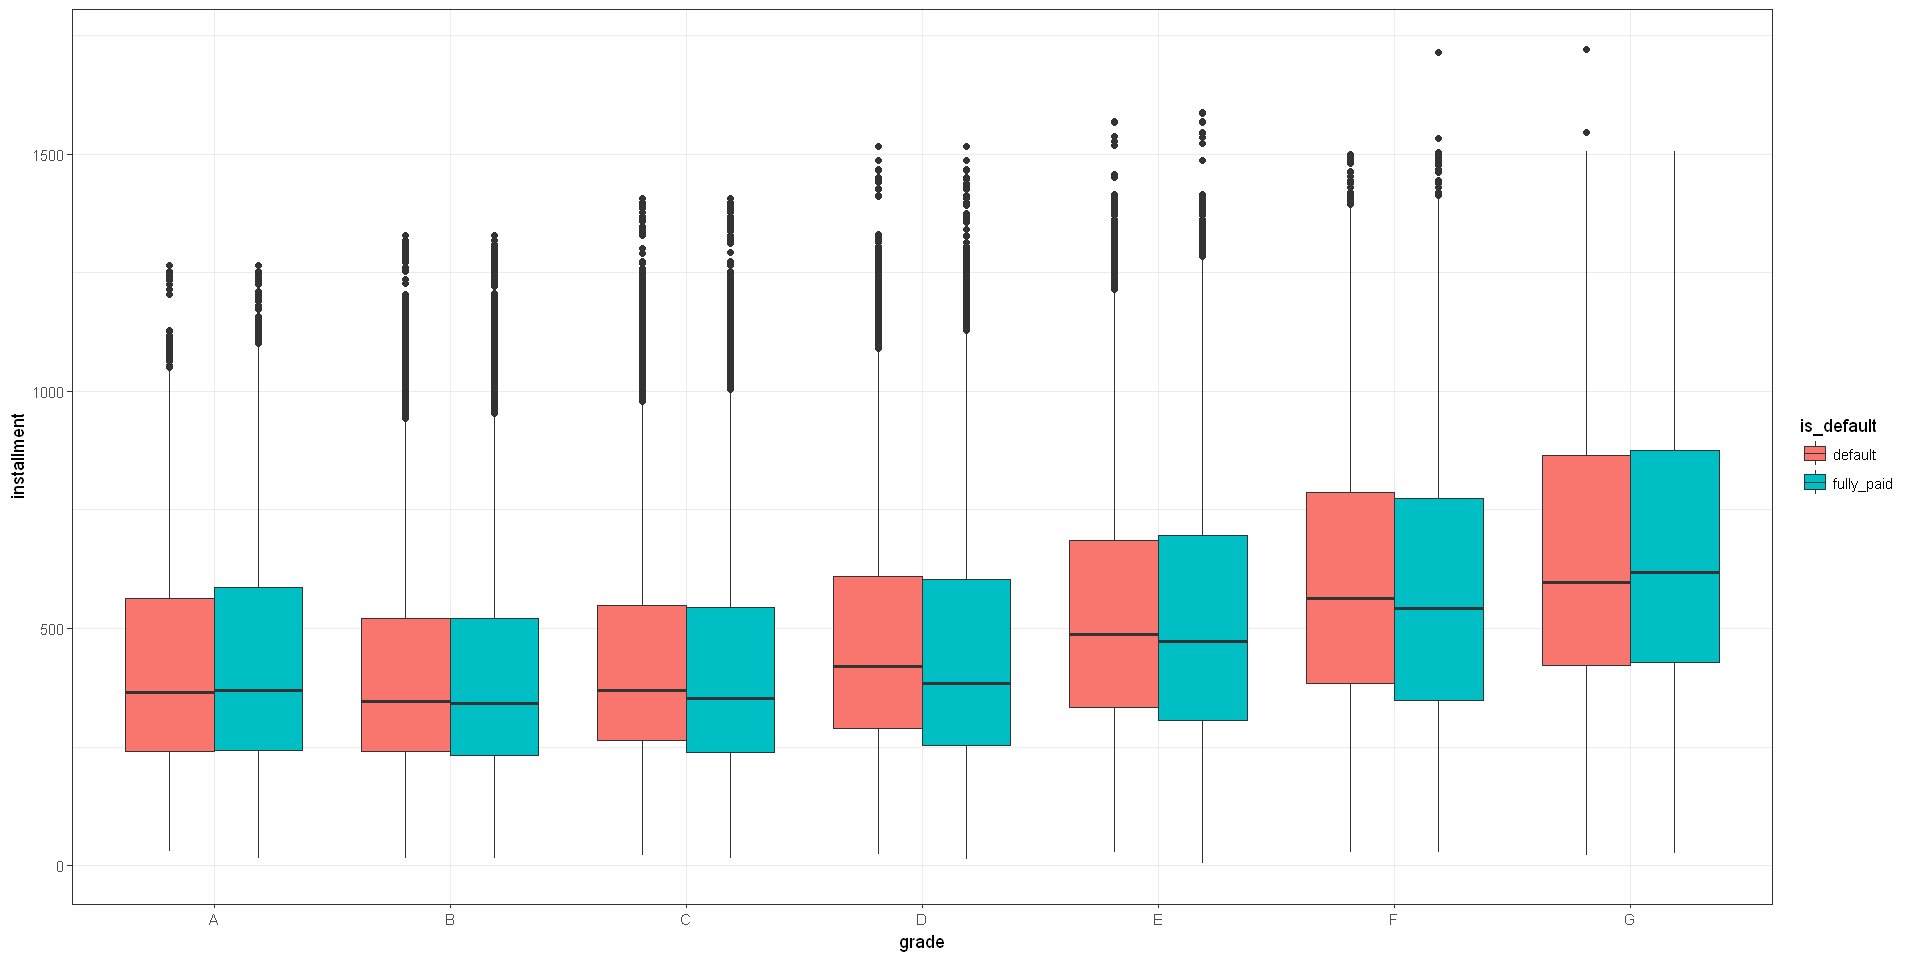

In [73]:
qplot(grade, installment, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()+ 
ggtitle("Installment and Grade Box Plot")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain")

Revolving Balance

Warning message:
"`position` is deprecated"

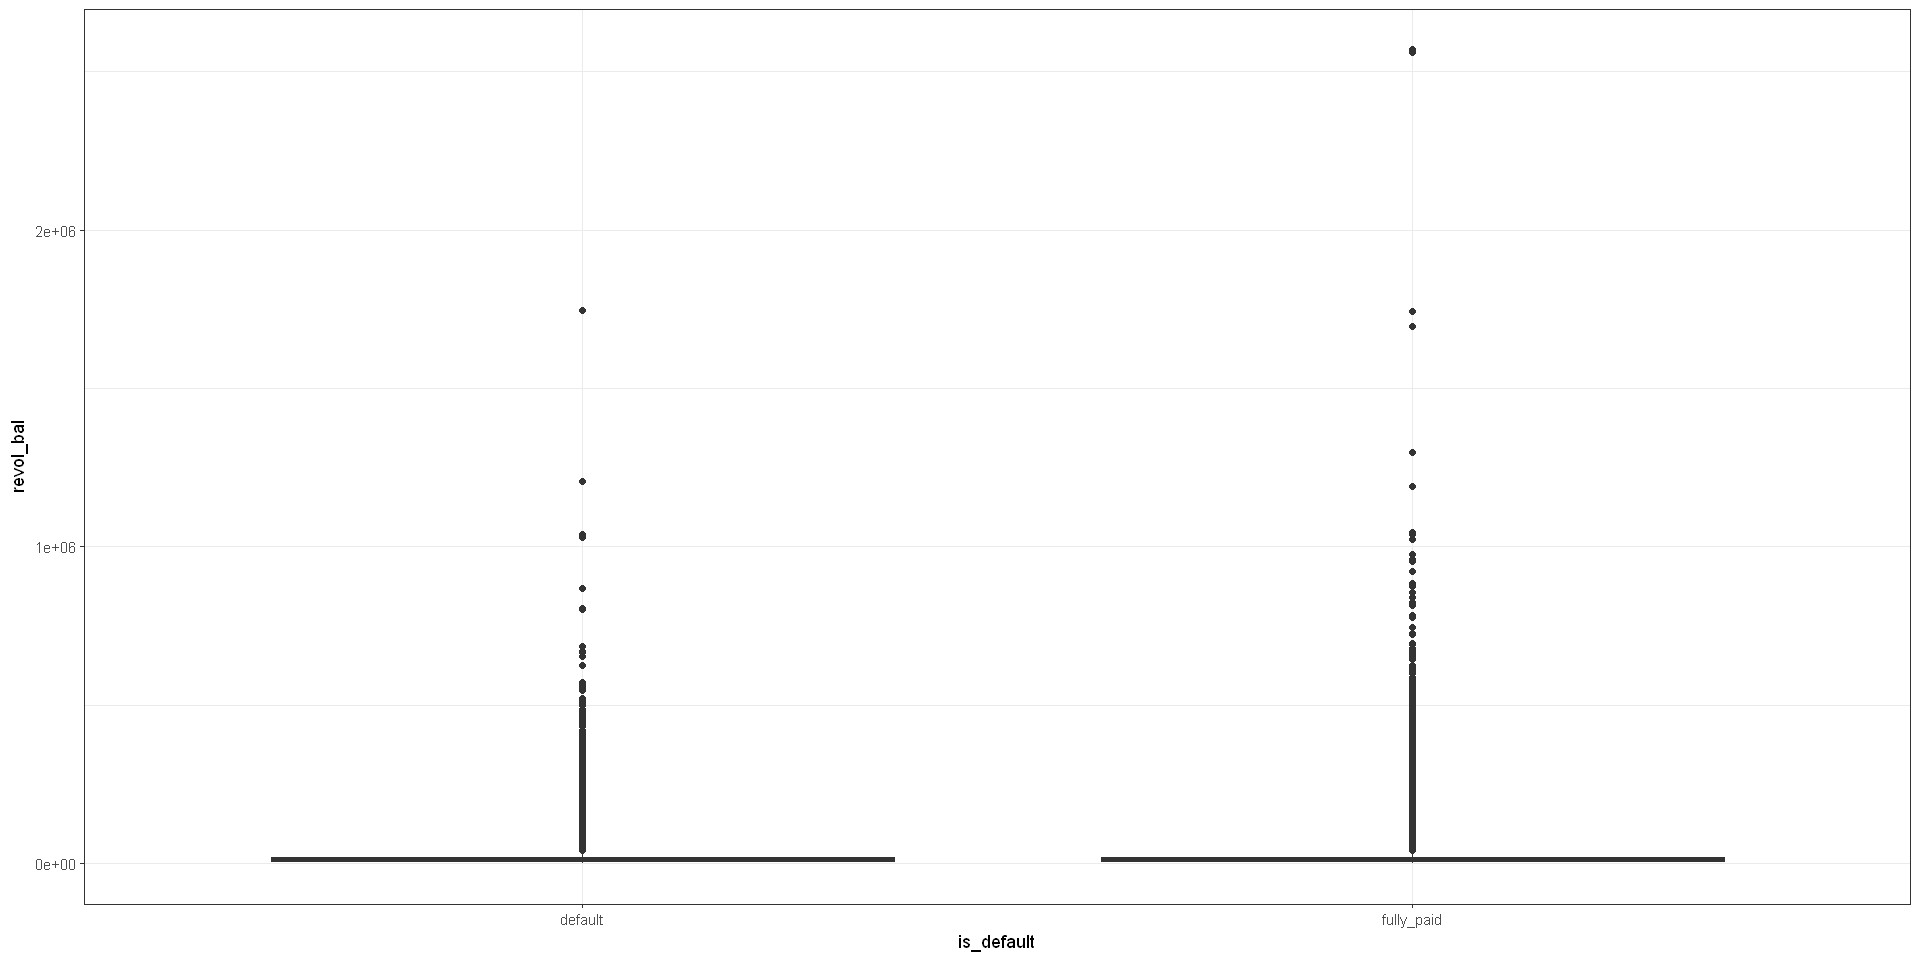

In [77]:
qplot(is_default, revol_bal, data=viz2, geom="boxplot", position="dodge")+theme_bw()

# pct_tl_nvr_dlq
Percent of trades never delinquent

Warning message:
"`position` is deprecated"Warning message:
"Removed 70417 rows containing non-finite values (stat_boxplot)."

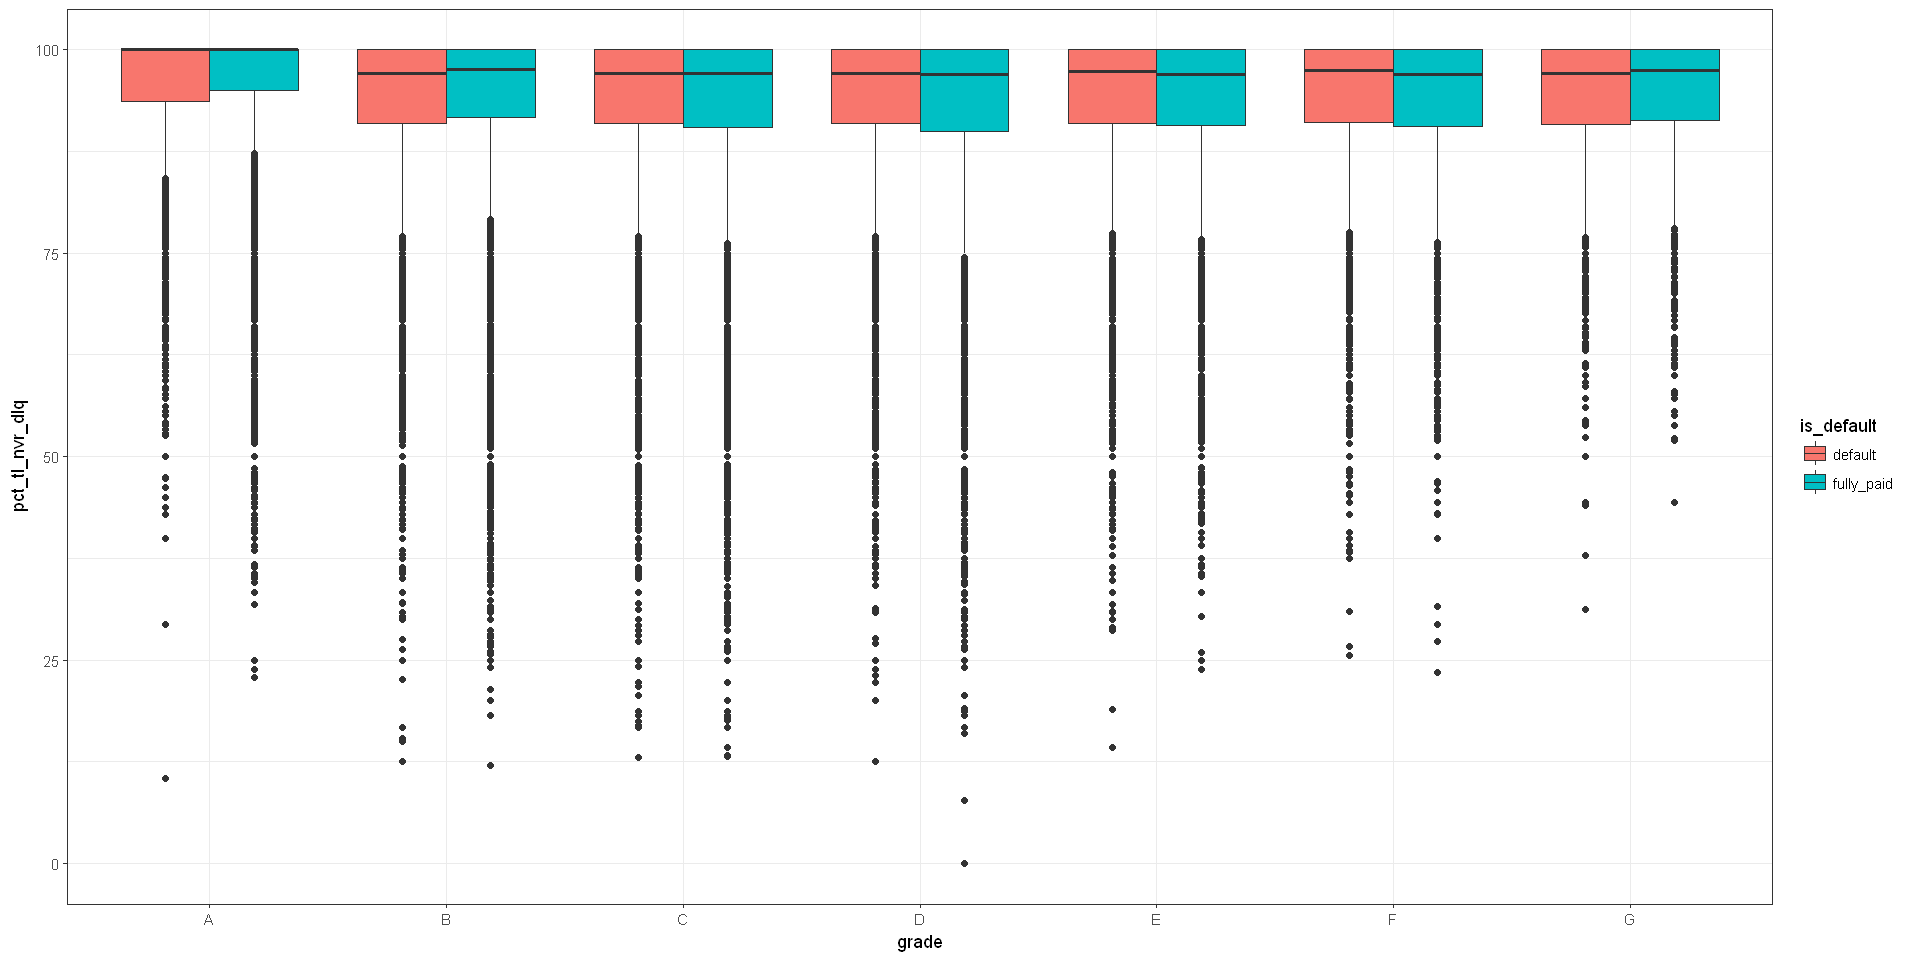

In [79]:
qplot(grade, pct_tl_nvr_dlq, fill=is_default, data=viz2, geom="boxplot", position="dodge")+theme_bw()+ 
ggtitle("Last_fico_range_hight and Grade Box Plot")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain")

In [16]:
g1 = viz2 %>% filter(is_default == "default") %>% group_by(addr_state) %>% summarise(default_count = n())
g2 = viz2 %>% group_by(addr_state) %>% summarise(count = n())
g3 = g2 %>% left_join(g1) %>% mutate(default_rate = 100*default_count/count) %>% select(addr_state,count,default_count,default_rate)

Joining, by = "addr_state"


In [13]:
table(viz2$is_default)


   default fully_paid 
    209484     673940 

In [ ]:
viz2$is_default

In [17]:
library(choroplethr)
library(choroplethrMaps)

Warning message:
"package 'choroplethr' was built under R version 3.4.3"Loading required package: acs
Warning message:
"package 'acs' was built under R version 3.4.3"Loading required package: XML
Warning message:
"package 'XML' was built under R version 3.4.3"
Attaching package: 'acs'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:base':

    apply

Warning message:
"package 'choroplethrMaps' was built under R version 3.4.3"

In [18]:
state.default_rate.df = data.frame(region = g3$addr_state, value = g3$default_rate)

In [19]:
full.name = c()
for(i in 1:51)
{
    if(i==8){
        full.name <- append(full.name, "district of columbia")
    }else{
        full.name <- append(full.name, tolower(state.name[state.default_rate.df[i,1] == state.abb]))
    }
}

state.default_rate.df$region = full.name

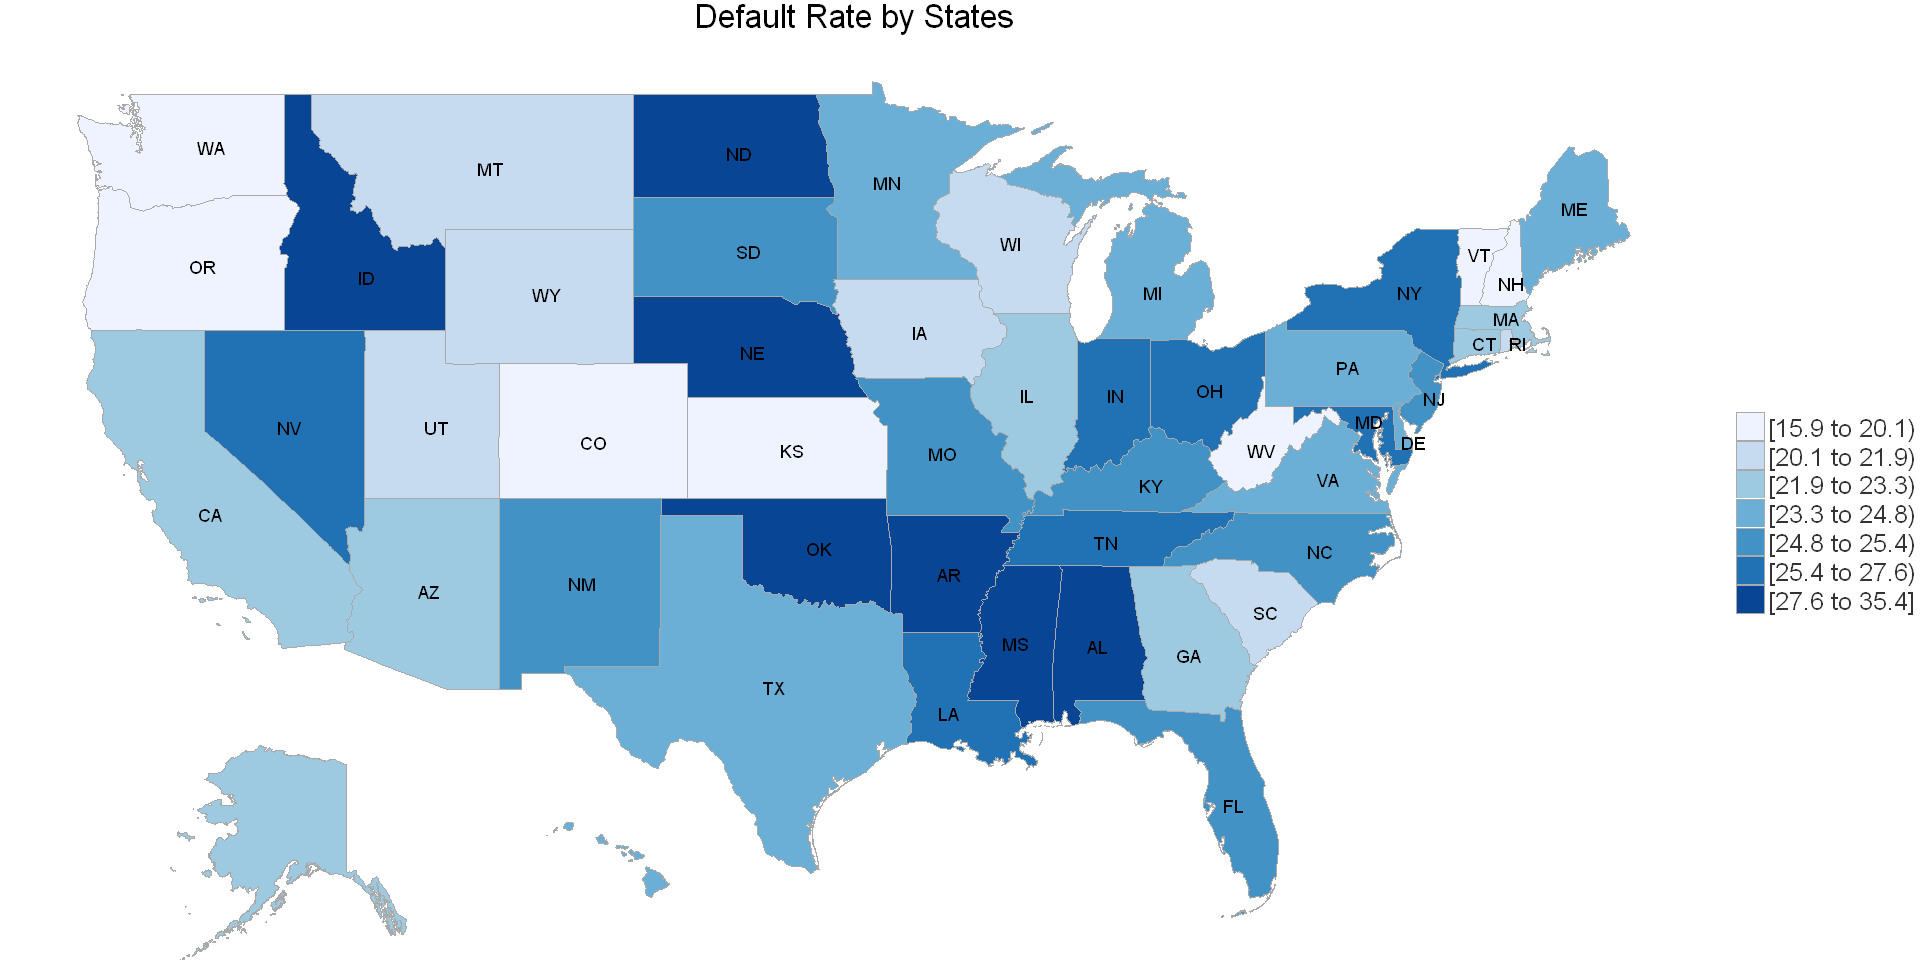

In [22]:
options(repr.plot.width=16, repr.plot.height=8)
state_choropleth(state.default_rate.df)+ 
ggtitle("Default Rate by States")+ 
theme(plot.title = element_text(size = 20, face = "plain",hjust=.5,vjust=.5))+
theme(axis.text.x = element_text(colour="grey20",size=15,angle=45,hjust=.5,vjust=.5,face="plain"),
axis.text.y = element_text(colour="grey20",size=15,angle=0,hjust=1,vjust=0,face="plain"),  
axis.title.x = element_text(colour="grey20",size=15,angle=0,hjust=.5,vjust=0,face="plain"),
axis.title.y = element_text(colour="grey20",size=15,angle=90,hjust=.5,vjust=.5,face="plain")) + 
theme(legend.text = element_text(colour="grey20", size=15, face="plain"))+
theme(legend.title = element_text(colour="grey20", size=15, face="plain"))